# `SciPy` commands for probability distributions and parameter conversions between `SciPy` and the [distributions webapp](https://a-herzog.github.io/Distributions/)

## General helper functions

### Imports

In [1]:
from math import sqrt, exp, log, pi, sinh, cosh
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import gamma as sp_gamma, zeta as sp_zeta

plt.style.use('seaborn-v0_8')

### Plotting discrete distributions

In [2]:
def plot_discrete(title, x, y_pmf):
    """
    Plot a discrete probability distribution with its probability mass function (pmf)
    and cumulative distribution function (cdf) on the same graph with two y-axes.
    Parameters:
    - title: str, the title of the plot.
    - x: list or np.array, the discrete values for the x-axis.
    - y_pmf: list or np.array, the probability mass function values corresponding to x.
    """

    y_cdf = np.cumsum(y_pmf)

    # Generate diagram
    _, ax = plt.subplots(figsize=(10, 5))

    # Probability mass function (pmf)
    ln1 = ax.bar(x, y_pmf, color=("green", 0.1), edgecolor=("darkgreen", 1))
    ax.tick_params(axis='y', labelcolor='green')
    ax.set_ylabel("Probability mass function (pmf)", color="green")
    ax.set_title(title)
    ax.set_ylim(ymin=0)
    ln1 = ax.legend(ln1, ["pmf"])
    ln1.remove()

    # Generate second y axis
    ax2 = plt.twinx()

    # Plot cumulative distribution function (cdf)
    ln2 = ax2.plot(x, y_cdf, color="red")  # type: ignore
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylabel("Cumulative distribution function (cdf)", color="red")
    ax2.set_ylim(ymin=0)
    ln2 = ax2.legend(ln2, ["cdf"])  # type: ignore
    ln2.remove()

    # Generate legend
    plt.legend(ln1.get_patches() + ln2.get_lines(), [text.get_text() for text in ln1.get_texts() + ln2.get_texts()])

    ax2.grid(False)  # Horizoncal lines for the pmf, not the cdf

### Plotting continuous distributions

In [9]:
def plot_continuous(title, x, y_pdf, y_cdf):
    """
    Plots the probability density function (pdf) and cumulative distribution function (cdf)
    of a continuous distribution on the same graph with two y-axes.
    Parameters:
    - title: str, the title of the plot.
    - x: array-like, the x values for the distribution.
    - y_pdf: array-like, the probability density function values.
    - y_cdf: array-like, the cumulative distribution function values.
    """

    # Generate diagram
    _, ax = plt.subplots(figsize=(10, 5))

    # Plot density (pdf)
    ln1 = ax.plot(x, y_pdf, color="green")
    ax.fill_between(x, y_pdf, color="green", alpha=0.1)  # Fill under the pdf curve
    ax.tick_params(axis='y', labelcolor='green')
    ax.set_ylabel("Density (pdf)", color="green")
    ax.set_title(title)

    # Generate second y axis
    ax2 = plt.twinx()

    # Plot cumulative distribution function (cdf)
    ln2 = ax2.plot(x, y_cdf, color="red")  # type: ignore
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylabel("Cumulative distribution function (cdf)", color="red")

    # Generate legend
    plt.legend(ln1 + ln2, ["pdf", "cdf"])

    ax.grid(False)  # Horizoncal lines for the cdf, not the pdf

## Discrete distributions

### Bernoulli distribution (discrete)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Bernoulli&p=0.25)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli)
* [Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_distribution)

mean = 0.25
variance = 0.188
standard deviation = 0.433
skewness = 1.155
kurtosis = -0.667
entropy = 0.562
mean = 0.25
variance = 0.188
standard deviation = 0.433


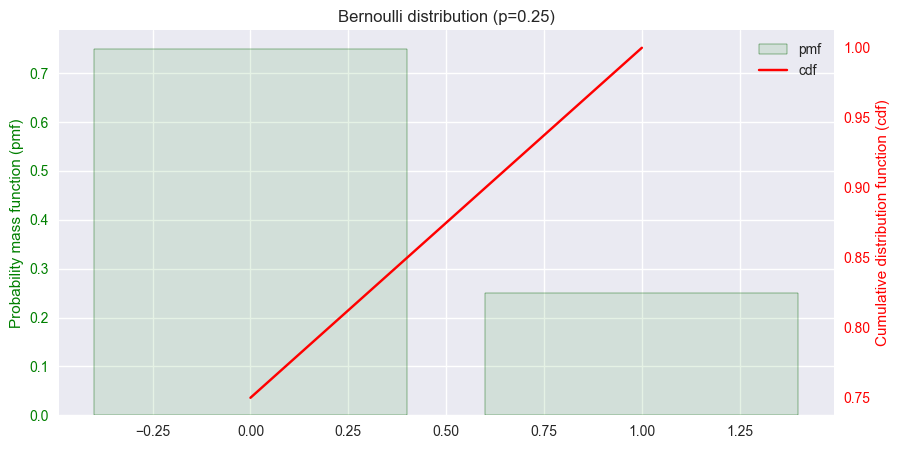

In [7]:
# Parameters for the Bernoulli distribution
p = 0.25  # probability of success

# Parameters for scipy.stats.bernoulli
p = p

# Characteristics of the Bernoulli distribution
print("mean =", np.round(stats.bernoulli.mean(p), 3))
print("variance =", np.round(stats.bernoulli.var(p), 3))
print("standard deviation =", np.round(stats.bernoulli.std(p), 3))
print("skewness =", np.round(stats.bernoulli.stats(p, moments='s'), 3))
print("kurtosis =", np.round(stats.bernoulli.stats(p, moments='k'), 3))
print("entropy =", np.round(stats.bernoulli.entropy(p), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(p, 3))
print("variance =", np.round(p * (1 - p), 3))
print("standard deviation =", np.round(sqrt(p * (1 - p)), 3))

# Plots of the pmf and cdf
k = [0, 1]
pmf = stats.bernoulli.pmf(k, p)
plot_discrete(f"Bernoulli distribution (p={p})", k, pmf)

### Binomial distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Binomial&n=8&p=0.25)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)
* [Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

mean = 2.0
variance = 1.5
standard deviation = 1.225
skewness = 0.408
kurtosis = -0.083
entropy = 1.596
mean = 2.0
variance = 1.5
standard deviation = 1.225


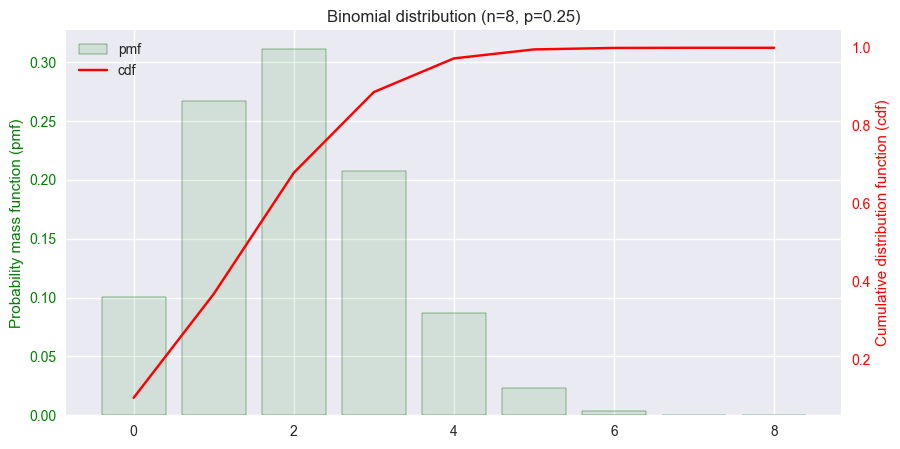

In [8]:
# Parameters for the binomial distribution
n = 8  # number of trials
p = 0.25  # probability of success in each trial

# Parameters for scipy.stats.binom
n = n
p = p

# Characterstics of the binomial distribution
print("mean =", np.round(stats.binom.mean(n, p), 3))
print("variance =", np.round(stats.binom.var(n, p), 3))
print("standard deviation =", np.round(stats.binom.std(n, p), 3))
print("skewness =", np.round(stats.binom.stats(n, p, moments='s'), 3))
print("kurtosis =", np.round(stats.binom.stats(n, p, moments='k'), 3))
print("entropy =", np.round(stats.binom.entropy(n, p), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(n * p, 3))
print("variance =", np.round(n * p * (1 - p), 3))
print("standard deviation =", np.round(sqrt(n * p * (1 - p)), 3))

# Plots of the pmf and cdf
k = np.arange(0, n + 1)
pmf = stats.binom.pmf(k, n, p)
plot_discrete(f"Binomial distribution (n={n}, p={p})", k, pmf)

### Boltzmann distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Boltzmann&lambda=0.25&N=20)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boltzmann.html#scipy.stats.boltzmann)
* No Wikipedia page

mean = 3.385
variance = 13.185
standard deviation = 3.631
skewness = 1.517
kurtosis = 2.292
entropy = 2.348
mean = 3.385
variance = 13.185
standard deviation = 3.631


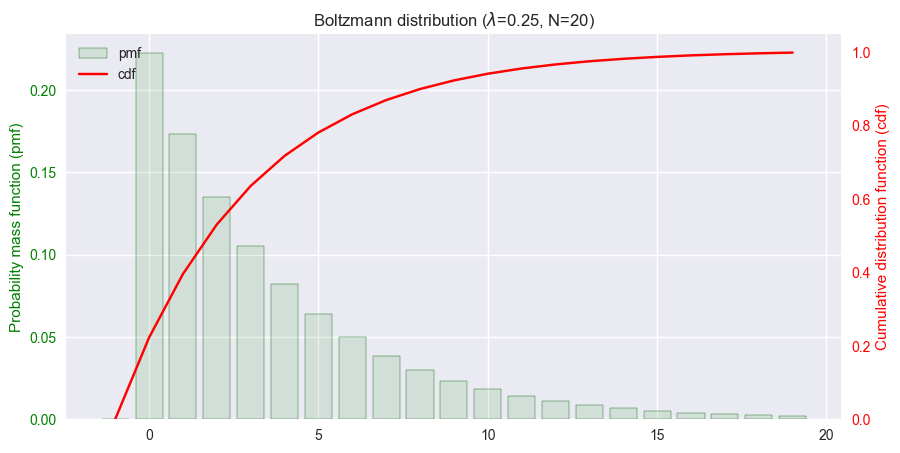

In [17]:
# Parameters for the Boltzmann distribution
lmbda = 0.25
N = 20

# Parameters for scipy.stats.boltzmann
lmbda = lmbda
N = N

# Characteristics of the Boltzmann distribution
print("mean =", np.round(stats.boltzmann.mean(lmbda, N), 3))
print("variance =", np.round(stats.boltzmann.var(lmbda, N), 3))
print("standard deviation =", np.round(stats.boltzmann.std(lmbda, N), 3))
print("skewness =", np.round(stats.boltzmann.stats(lmbda, N, moments='s'), 3))
print("kurtosis =", np.round(stats.boltzmann.stats(lmbda, N, moments='k'), 3))
print("entropy =", np.round(stats.boltzmann.entropy(lmbda, N), 3))

# Direct calculation of mean, variance, and standard deviation
z = exp(-lmbda)
zN = exp(-lmbda * N)
mu = z / (1.0 - z) - N * zN / (1 - zN)
var = z / (1.0 - z)**2 - N * N * zN / (1 - zN)**2
print("mean =", np.round(mu, 3))
print("variance =", np.round(var, 3))
print("standard deviation =", np.round(sqrt(var), 3))

# Plots of the pmf and cdf
k = np.arange(-1, N)
pmf = stats.boltzmann.pmf(k, lmbda, N)
plot_discrete(f"Boltzmann distribution ($\\lambda$={lmbda}, N={N})", k, pmf)

### Borel distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Borel&mu=0.9)
* [Wikipedia](https://en.wikipedia.org/wiki/Borel_distribution)

The Borel distribution is not implemented in SciPy.

### Gauß Kuzmin distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=GaussKuzmin)
* [Wikipedia](https://en.wikipedia.org/wiki/Gauss%E2%80%93Kuzmin_distribution)

The Gauß Kuzmin distribution is not implemented in SciPy.

### Geometric distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Geometric&p=0.25)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom)
* [Wikipedia](https://en.wikipedia.org/wiki/Geometric_distribution)

mean = 3.0
variance = 12.0
standard deviation = 3.464
skewness = 2.021
kurtosis = 6.083
entropy = 2.249
mean = 3.0
variance = 12.0
standard deviation = 3.464


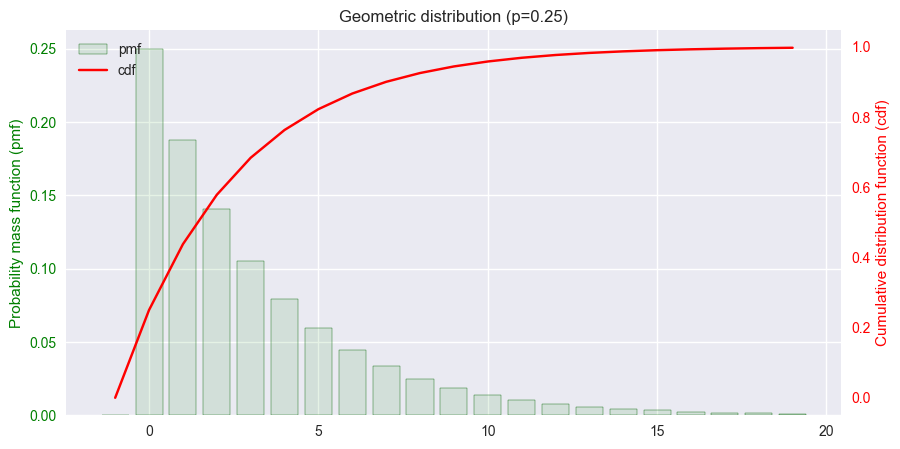

In [9]:
# Parameters for the geometric distribution
p = 0.25  # probability of success

# Parameters for scipy.stats.geom
p = p
loc = -1  # location parameter (default is 0, but we use -1 for the first success at k=1)

# Characteristics of the geometric distribution
print("mean =", np.round(stats.geom.mean(p, loc=loc), 3))
print("variance =", np.round(stats.geom.var(p, loc=loc), 3))
print("standard deviation =", np.round(stats.geom.std(p, loc=loc), 3))
print("skewness =", np.round(stats.geom.stats(p, loc=loc, moments='s'), 3))
print("kurtosis =", np.round(stats.geom.stats(p, loc=loc, moments='k'), 3))
print("entropy =", np.round(stats.geom.entropy(p, loc=loc), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((1 - p) / p, 3))
print("variance =", np.round((1 - p) / p**2, 3))
print("standard deviation =", np.round(sqrt((1 - p) / p**2), 3))

# Plots of the pmf and cdf
k = np.arange(-1, 20)
pmf = stats.geom.pmf(k, p, loc=loc)
plot_discrete(f"Geometric distribution (p={p})", k, pmf)

### Hypergeometric distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Hypergeometric&N=50&R=20&n=8)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html#scipy.stats.hypergeom)
* [Wikipedia](https://en.wikipedia.org/wiki/Hypergeometric_distribution)

mean = 3.2
variance = 1.646
standard deviation = 1.283
skewness = 0.11
kurtosis = -0.177
entropy = 1.665
mean = 3.2
variance = 1.646
standard deviation = 1.283


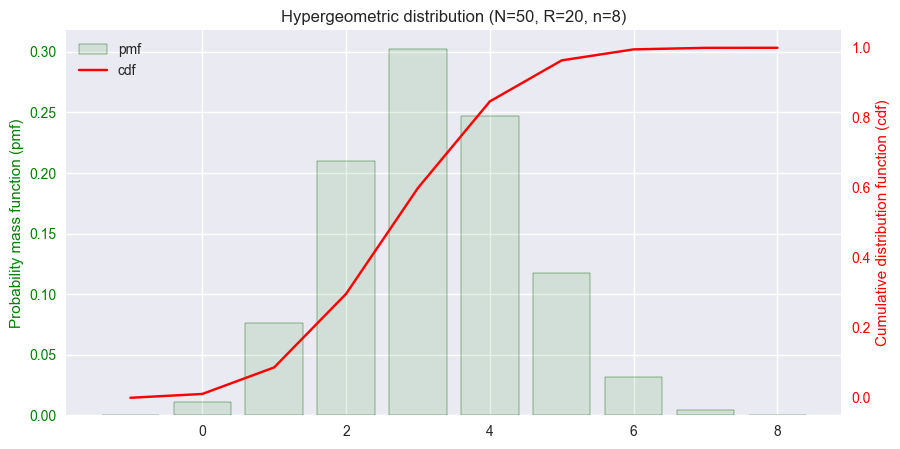

In [10]:
# Parameters for the hypergeometric distribution
N = 50  # population size
R = 20  # number of success states in the population
n = 8  # number of draws

# Parameters for scipy.stats.hypergeom
M = N
ngood = R
nsample = n

# Characteristics of the hypergeometric distribution
print("mean =", np.round(stats.hypergeom.mean(M, ngood, nsample), 3))
print("variance =", np.round(stats.hypergeom.var(M, ngood, nsample), 3))
print("standard deviation =", np.round(stats.hypergeom.std(M, ngood, nsample), 3))
print("skewness =", np.round(stats.hypergeom.stats(M, ngood, nsample, moments='s'), 3))
print("kurtosis =", np.round(stats.hypergeom.stats(M, ngood, nsample, moments='k'), 3))
print("entropy =", np.round(stats.hypergeom.entropy(M, ngood, nsample), 3))

# Direct calculation of mean, variance, and standard deviation
mean = n * R / N
var = n * R * (N - R) * (N - n) / (N**2 * (N - 1))
print("mean =", np.round(mean, 3))
print("variance =", np.round(var, 3))
print("standard deviation =", np.round(sqrt(var), 3))

# Plots of the pmf and cdf
k = np.arange(-1, min(n, R) + 1)
pmf = stats.hypergeom.pmf(k, M, ngood, nsample)
plot_discrete(f"Hypergeometric distribution (N={N}, R={R}, n={n})", k, pmf)

### Logarithmic distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Logarithmic&p=0.8)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logser.html#scipy.stats.logser)
* [Wikipedia](https://en.wikipedia.org/wiki/Logarithmic_distribution)

mean = 2.485
variance = 6.25
standard deviation = 2.5
skewness = 3.193
kurtosis = 15.891
entropy = 1.636
mean = 2.485
variance = 6.25
standard deviation = 2.5


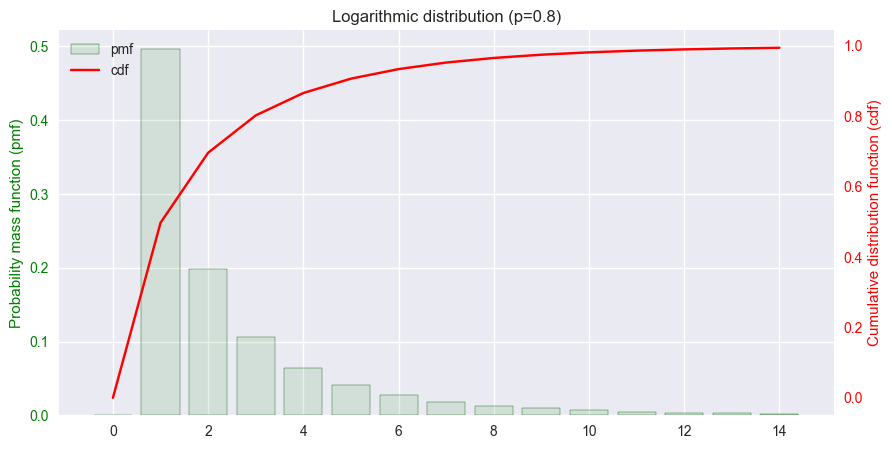

In [11]:
# Parameters for the logarithmic distribution
p = 0.8  # probability parameter

# Parameters for scipy.stats.logser
p = p

# Characteristics of the logarithmic distribution
print("mean =", np.round(stats.logser.mean(p), 3))
print("variance =", np.round(stats.logser.var(p), 3))
print("standard deviation =", np.round(stats.logser.std(p), 3))
print("skewness =", np.round(stats.logser.stats(p, moments='s'), 3))
print("kurtosis =", np.round(stats.logser.stats(p, moments='k'), 3))
print("entropy =", np.round(stats.logser.entropy(p), 3))

# Direct calculation of mean, variance, and standard deviation
mean = -p / ((1 - p) * np.log(1 - p))
var = -p * (p + np.log(1 - p)) / ((1 - p)**2 * (np.log(1 - p))**2)
std = np.sqrt(var)
print("mean =", np.round(mean, 3))
print("variance =", np.round(var, 3))
print("standard deviation =", np.round(std, 3))

# Plots of the pmf and cdf
k = np.arange(0, 15)
pmf = stats.logser.pmf(k, p)
plot_discrete(f"Logarithmic distribution (p={p})", k, pmf)

### Negative binomial distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=NegativeBinomial&r=8&p=0.25)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom)
* [Wikipedia](https://en.wikipedia.org/wiki/Negative_binomial_distribution)

mean = 24.0
variance = 96.0
standard deviation = 9.798
skewness = 0.714
kurtosis = 0.76
entropy = 3.657
mean = 24.0
variance = 96.0
standard deviation = 9.798


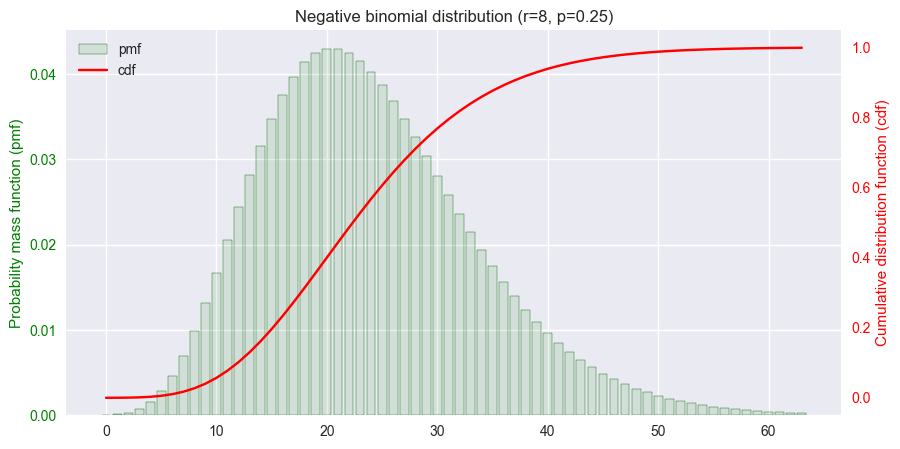

In [12]:
# Parameters for the negative binomial distribution
r = 8  # number of successes
p = 0.25  # probability of success

# Parameters for scipy.stats.nbinom
n = r

# Characteristics of the negative binomial distribution
print("mean =", np.round(stats.nbinom.mean(n, p), 3))
print("variance =", np.round(stats.nbinom.var(n, p), 3))
print("standard deviation =", np.round(stats.nbinom.std(n, p), 3))
print("skewness =", np.round(stats.nbinom.stats(n, p, moments='s'), 3))
print("kurtosis =", np.round(stats.nbinom.stats(n, p, moments='k'), 3))
print("entropy =", np.round(stats.nbinom.entropy(n, p), 3))

# Direct calculation of mean, variance, and standard deviation
mean = n * (1 - p) / p
var = n * (1 - p) / (p ** 2)
std = sqrt(var)
print("mean =", np.round(mean, 3))
print("variance =", np.round(var, 3))
print("standard deviation =", np.round(std, 3))

# Plots of the pmf and cdf
k = np.arange(0, mean + 4 * std)
pmf = stats.nbinom.pmf(k, n, p)
plot_discrete(f"Negative binomial distribution (r={r}, p={p})", k, pmf)

### Negative hypergeometric distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=NegativeHypergeometric&N=50&R=20&n=5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nhypergeom.html#scipy.stats.nhypergeom)
* [Wikipedia](https://en.wikipedia.org/wiki/Negative_hypergeometric_distribution)

mean = 12.143
variance = 12.616
standard deviation = 3.552
skewness = 0.519
kurtosis = 0.103
entropy = 2.654
mean = 12.143
variance = 12.616
standard deviation = 3.552


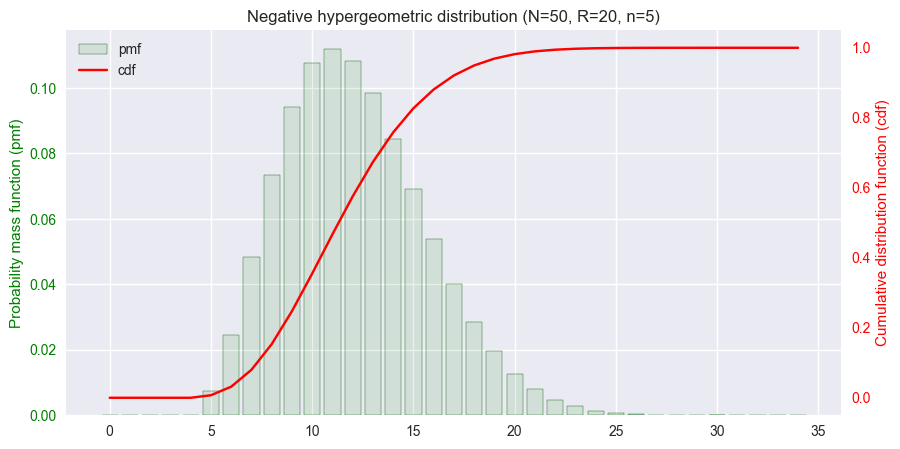

In [13]:
# Parameters for the negative hypergeometric distribution
N = 50  # population size
R = 20  # number of success states in the population
n = 5  # number of draws of success states

# Parameters for scipy.stats.nhypergeom
M = N
K = N - R
r = n

# Characteristics of the negative hypergeometric distribution
# Note: The mean is adjusted by adding n since SciPy is only counting the number of failures
print("mean =", np.round(stats.nhypergeom.mean(M, K, r) + n, 3))  # type: ignore
print("variance =", np.round(stats.nhypergeom.var(M, K, r), 3))
print("standard deviation =", np.round(stats.nhypergeom.std(M, K, r), 3))
print("skewness =", np.round(stats.nhypergeom.stats(M, K, r, moments='s'), 3))
print("kurtosis =", np.round(stats.nhypergeom.stats(M, K, r, moments='k'), 3))
print("entropy =", np.round(stats.nhypergeom.entropy(M, K, r), 3))

# Direct calculation of mean, variance, and standard deviation
mean = n * (N + 1) / (R + 1)
var = n * (R + 1 - n) * (N - R) * (N + 1) / ((R + 1)**2 * (R + 2))
print("mean =", np.round(mean, 3))
print("variance =", np.round(var, 3))
print("standard deviation =", np.round(sqrt(var), 3))

# Plots of the pmf and cdf
k = np.arange(0, K + 1)
pmf = stats.nhypergeom.pmf(k, M, K, r)
# Note: The distribution is shifted by adding n since SciPy is only counting the number of failures
pmf = np.insert(pmf, 0, [0, 0, 0, 0, 0])
k = np.append(k, list(range(K, K + n)))
plot_discrete(f"Negative hypergeometric distribution (N={N}, R={R}, n={n})", k, pmf)

### Planck distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Planck&lambda=0.5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.planck.html#scipy.stats.planck)
* No Wikipedia page available

mean = 1.541
variance = 3.918
standard deviation = 1.979
skewness = 2.063
kurtosis = 6.255
entropy = 1.703
mean = 1.541
variance = 3.918
standard deviation = 1.979


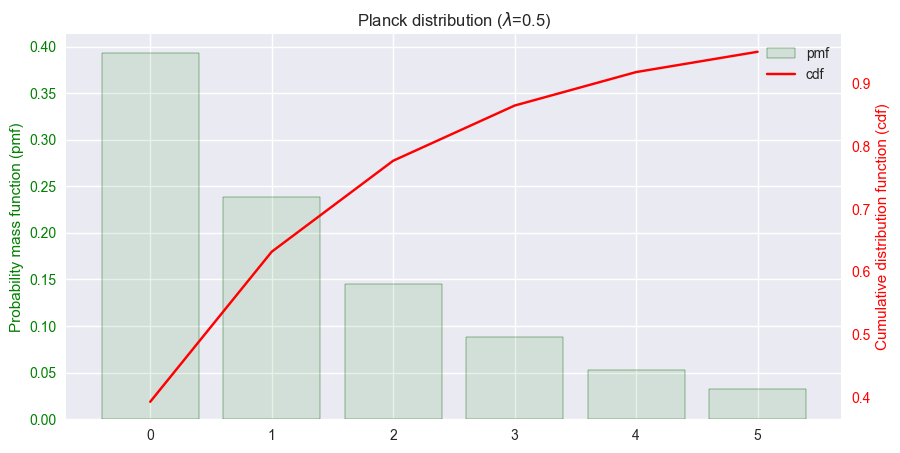

In [13]:
# Parameter for the Planck distribution
lmbda = 0.5

# Parameter for scipy.stats.planck
lmbda = lmbda

# Characterstics of the binomial distribution
print("mean =", np.round(stats.planck.mean(lmbda), 3))
print("variance =", np.round(stats.planck.var(lmbda), 3))
print("standard deviation =", np.round(stats.planck.std(lmbda), 3))
print("skewness =", np.round(stats.planck.stats(lmbda, moments='s'), 3))
print("kurtosis =", np.round(stats.planck.stats(lmbda, moments='k'), 3))
print("entropy =", np.round(stats.planck.entropy(lmbda), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(1/(exp(lmbda)-1), 3))
print("variance =", np.round(exp(-lmbda)/(exp(-lmbda)-1)**2, 3))
print("standard deviation =", np.round(sqrt(exp(-lmbda))/(1-exp(-lmbda)), 3))

# Plots of the pmf and cdf
k = np.arange(0, lmbda + 5 * round(sqrt(lmbda)))
pmf = stats.planck.pmf(k, lmbda)
plot_discrete(f"Planck distribution ($\\lambda$={lmbda})", k, pmf)

### Poisson distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Poisson&lambda=5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nhypergeom.html#scipy.stats.nhypergeom)
* [Wikipedia](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson)

mean = 5.0
variance = 5.0
standard deviation = 2.236
skewness = 0.447
kurtosis = 0.2
entropy = 2.204
mean = 5
variance = 5
standard deviation = 2.236


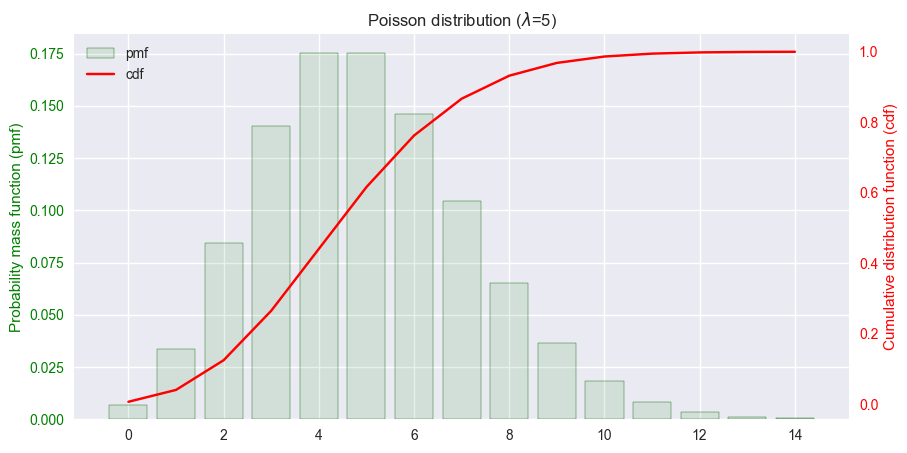

In [ ]:
# Parameter for the Poisson distribution
lmbda = 5  # Expected value (lambda)

# Parameter for scipy.stats.poisson
mu = lmbda

# Characterstics of the binomial distribution
print("mean =", np.round(stats.poisson.mean(mu), 3))
print("variance =", np.round(stats.poisson.var(mu), 3))
print("standard deviation =", np.round(stats.poisson.std(mu), 3))
print("skewness =", np.round(stats.poisson.stats(mu, moments='s'), 3))
print("kurtosis =", np.round(stats.poisson.stats(mu, moments='k'), 3))
print("entropy =", np.round(stats.poisson.entropy(mu), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(lmbda, 3))
print("variance =", np.round(lmbda, 3))
print("standard deviation =", np.round(sqrt(lmbda), 3))

# Plots of the pmf and cdf
k = np.arange(0, lmbda + 5 * round(sqrt(lmbda)))
pmf = stats.poisson.pmf(k, mu)
plot_discrete(f"Poisson distribution ($\\lambda$={lmbda})", k, pmf)

### Rademacher distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Rademacher)
* [Wikipedia](https://en.wikipedia.org/wiki/Rademacher_distribution)

The Rademacher distribution is not implemented in SciPy.

### Uniform distribution (discrete)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/index_de.html?distribution=DiscreteUniform&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint)
* [Wikipedia](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)

mean = 7.5
variance = 2.917
standard deviation = 1.708
skewness = 0.0
kurtosis = -1.269
entropy = 1.792
mean = 7.5
variance = 2.917
standard deviation = 1.708


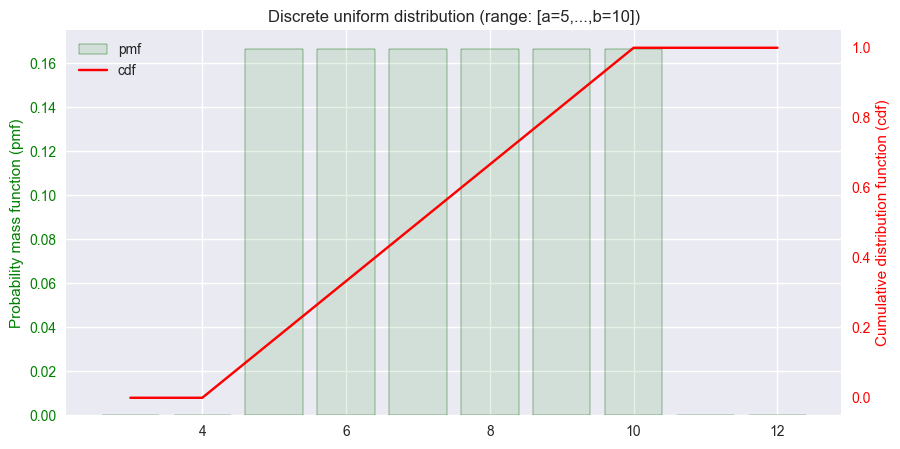

In [15]:
# Parameters for the discrete uniform distribution
a = 5  # lower bound (already defined)
b = 10  # upper bound (already defined)

# Parameters for scipy.stats.randint
low = a
high = b + 1  # randint is [low, high)

# Characteristics of the discrete uniform distribution
print("mean =", np.round(stats.randint.mean(low, high), 3))
print("variance =", np.round(stats.randint.var(low, high), 3))
print("standard deviation =", np.round(stats.randint.std(low, high), 3))
print("skewness =", np.round(stats.randint.stats(low, high, moments='s'), 3))
print("kurtosis =", np.round(stats.randint.stats(low, high, moments='k'), 3))
print("entropy =", np.round(stats.randint.entropy(low, high), 3))

# Direct calculation of mean, variance, and standard deviation
n = b - a + 1
print("mean =", np.round((a + b) / 2, 3))
print("variance =", np.round((n**2 - 1) / 12, 3))
print("standard deviation =", np.round(sqrt((n**2 - 1) / 12), 3))

# Plots of the pmf and cdf
k = np.arange(a - 2, b + 3)
pmf = stats.randint.pmf(k, low, high)
plot_discrete(f"Discrete uniform distribution (range: [a={a},...,b={b}])", k, pmf)

### Zeta distribution (Zipf distribution)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/index_de.html?distribution=Zeta&s=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zipf.html#scipy.stats.zipf)
* [Wikipedia](https://en.wikipedia.org/wiki/Zeta_distribution)

mean = 1.368
variance = inf
standard deviation = inf
skewness = inf
kurtosis = inf
entropy = 0.678
mean = 1.368
variance = inf
standard deviation = inf


c:\Users\Alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2410: RuntimeWarning: expect(): sum did not converge
  outputs = func(*inputs)
c:\Users\Alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: expect(): sum did not converge
  outputs = ufunc(*inputs)


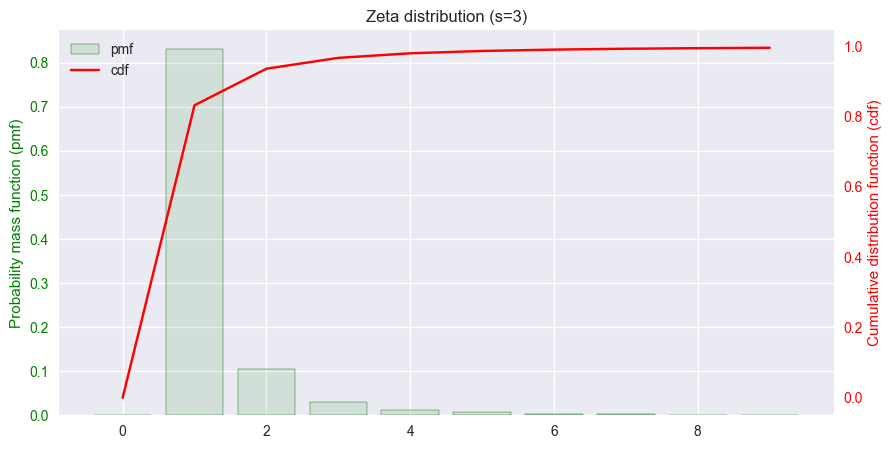

In [16]:
# Parameters for the Zeta distribution
s = 3

# Parameters for scipy.stats.zipf
a = s

# Characterstics of the zeta distribution
print("mean =", np.round(stats.zipf.mean(a), 3) if s >= 3 else "inf")
print("variance =", np.round(stats.zipf.var(a), 3) if s >= 4 else "inf")
print("standard deviation =", np.round(stats.zipf.std(a), 3) if s >= 4 else "inf")
print("skewness =", np.round(stats.zipf.stats(a, moments='s'), 3) if s >= 4 else "inf")
print("kurtosis =", np.round(stats.zipf.stats(a, moments='k'), 3) if s >= 4 else "inf")
print("entropy =", np.round(stats.zipf.entropy(a), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(sp_zeta(s - 1) / sp_zeta(s), 3) if s >= 3 else "inf")
print("variance =", np.round((sp_zeta(s) * sp_zeta(s - 2) - (sp_zeta(s - 1))**2) / ((sp_zeta(s))**2), 3) if s >= 4 else "inf")
print("standard deviation =", np.round(sqrt((sp_zeta(s) * sp_zeta(s - 2) - (sp_zeta(s - 1))**2) / ((sp_zeta(s))**2)), 3) if s >= 4 else "inf")

# Plots of the pmf and cdf
k = np.arange(0, 10)
pmf = stats.zipf.pmf(k, a)
plot_discrete(f"Zeta distribution (s={s})", k, pmf)

## Continuous distributions

### Arcsine distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Arcsine&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.arcsine.html#scipy.stats.arcsine)
* No Wikipedia page

mean = 7.5
variance = 3.125
standard deviation = 1.768
skewness = 0.0
kurtosis = -1.5
entropy = 1.368
mean = 7.5
variance = 3.125
standard deviation = 1.768


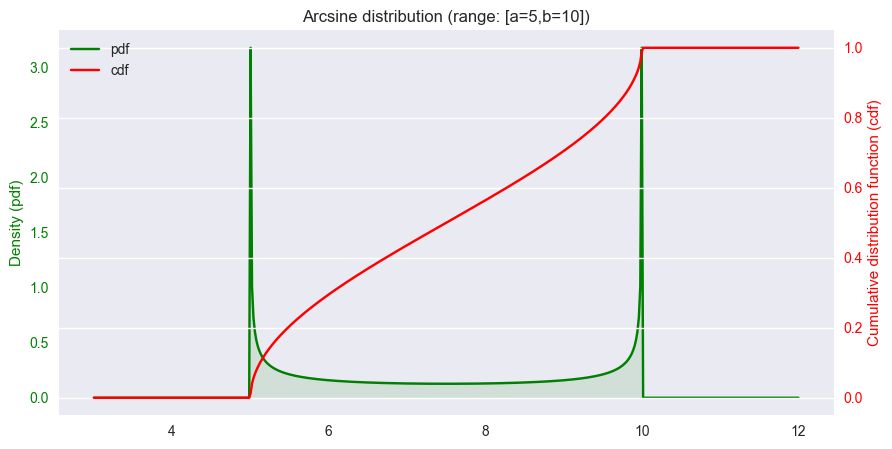

In [10]:
# Parameters for the arcsine distribution
a = 5  # Lower bound of the distribution
b = 10  # Upper bound of the distribution

# Parameters for scipy.stats.arcsine
loc = a
scale = b - a

# Characteristics of the arcsine distribution
print("mean =", np.round(stats.arcsine.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.arcsine.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.arcsine.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.arcsine.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.arcsine.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.arcsine.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((a + b) / 2, 3))
print("variance =", np.round(((b - a) ** 2) / 8, 3))
print("standard deviation =", np.round(sqrt(((b - a) ** 2) / 8), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.arcsine.pdf(x, loc=loc, scale=scale)
cdf = stats.arcsine.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Arcsine distribution (range: [a={a},b={b}])", x, pdf, cdf)

### Bernoulli distribution (continuous)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=ContinuousBernoulli&a=5&b=10&lambda=0.3)
* [Wikipedia](https://en.wikipedia.org/wiki/Continuous_Bernoulli_distribution)

Continuous Bernoulli distribution is not implemented in SciPy.

### Beta distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Beta&alpha=2&beta=1.5&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta)
* [Wikipedia](https://en.wikipedia.org/wiki/Beta_distribution)

mean = 7.857
variance = 1.361
standard deviation = 1.166
skewness = -0.223
kurtosis = -0.86
entropy = 1.501
mean = 7.857
variance = 1.361
standard deviation = 1.166


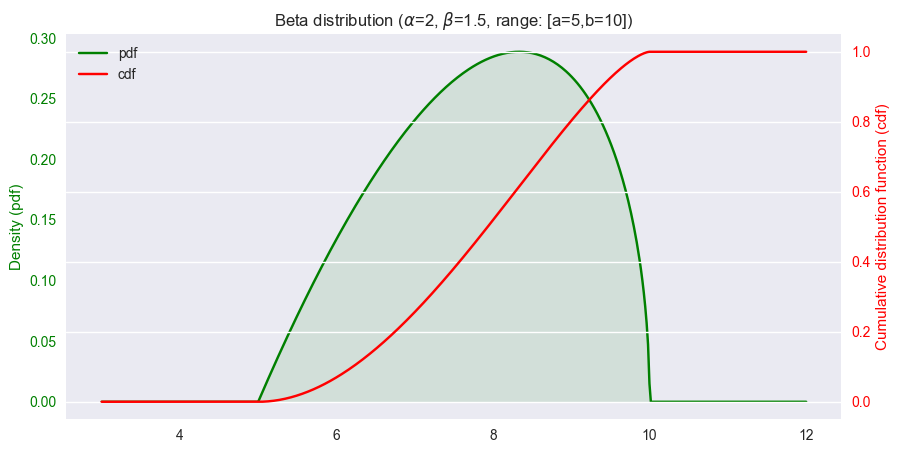

In [18]:
# Parameters for the beta distribution
alpha = 2  # alpha parameter
beta = 1.5  # beta parameter
a = 5  # lower bound
b = 10  # upper bound

# Parameters for scipy.stats.beta
loc = a
scale = b - a

# Characteristics of the beta distribution
print("mean =", np.round(stats.beta.mean(alpha, beta, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.beta.var(alpha, beta, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.beta.std(alpha, beta, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.beta.stats(alpha, beta, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.beta.stats(alpha, beta, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.beta.entropy(alpha, beta, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(a + (b - a) * alpha / (alpha + beta), 3))
print("variance =", np.round(((b - a) ** 2) * (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1)), 3))
print("standard deviation =", np.round(sqrt(((b - a) ** 2) * (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.beta.pdf(x, alpha, beta, loc=loc, scale=scale)
cdf = stats.beta.cdf(x, alpha, beta, loc=loc, scale=scale)
plot_continuous(f"Beta distribution ($\\alpha$={alpha}, $\\beta$={beta}, range: [a={a},b={b}])", x, pdf, cdf)

### Cauchy distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Cauchy&t=0&s=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html#scipy.stats.cauchy)
* [Wikipedia](https://en.wikipedia.org/wiki/Cauchy_distribution)

mean = nan
variance = nan
standard deviation = nan
skewness = nan
kurtosis = nan
entropy = 3.63


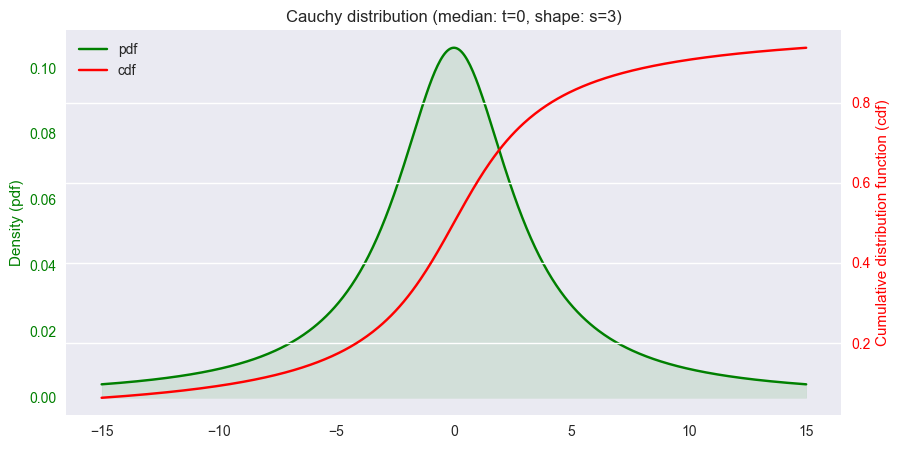

In [19]:
# Parameters for the Cauchy distribution
t = 0  # median (location)
s = 3  # shape (scale)

# Parameters for scipy.stats.cauchy
loc = t
scale = s

# Characteristics of the Cauchy distribution
print("mean =", np.round(stats.cauchy.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.cauchy.var(loc=loc, scale=scale), 3))
print("standard deviation =", stats.cauchy.std(loc=loc, scale=scale))
print("skewness =", np.round(stats.cauchy.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.cauchy.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.cauchy.entropy(loc=loc, scale=scale), 3))

# Plots of pdf and cdf
x = np.linspace(t - 15, t + 15, 500)
pdf = stats.cauchy.pdf(x, loc=loc, scale=scale)
cdf = stats.cauchy.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Cauchy distribution (median: t={t}, shape: s={s})", x, pdf, cdf)

### $\chi^2$ distribution (Chi squard distribution)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Chi2&k=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)
* [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution)

mean = 3.0
variance = 6.0
standard deviation = 2.449
skewness = 1.633
kurtosis = 4.0
entropy = 2.054
mean = 3
variance = 6
standard deviation = 2.449


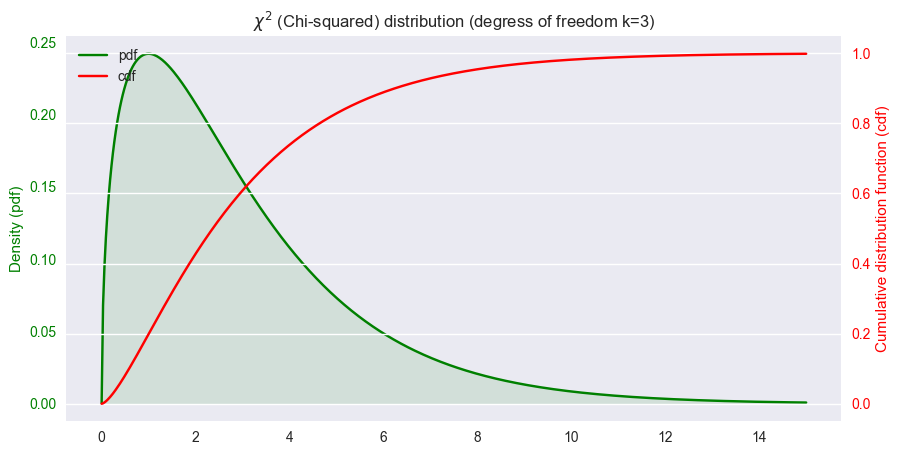

In [20]:
# Parameters for the chi^2 distribution
k = 3  # degrees of freedom

# Parameters for scipy.stats.chi2
df = k

# Characteristics of the chi^2 distribution
print("mean =", np.round(stats.chi2.mean(df), 3))
print("variance =", np.round(stats.chi2.var(df), 3))
print("standard deviation =", np.round(stats.chi2.std(df), 3))
print("skewness =", np.round(stats.chi2.stats(df, moments='s'), 3))
print("kurtosis =", np.round(stats.chi2.stats(df, moments='k'), 3))
print("entropy =", np.round(stats.chi2.entropy(df), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(k, 3))
print("variance =", np.round(2 * k, 3))
print("standard deviation =", np.round(sqrt(2 * k), 3))

# Plots of pdf and cdf
x = np.linspace(0, 15, 500)
pdf = stats.chi2.pdf(x, df)
cdf = stats.chi2.cdf(x, df)
plot_continuous(
    f"$\\chi^2$ (Chi-squared) distribution (degress of freedom k={k})", x, pdf, cdf)

### $\chi$ distribution (Chi distribution)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Chi&k=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html#scipy.stats.chi)
* [Wikipedia](https://en.wikipedia.org/wiki/Chi_distribution)

mean = 1.596
variance = 0.454
standard deviation = 0.673
skewness = 0.486
kurtosis = 0.108
entropy = 0.996
mean = 1.596
variance = 0.454
standard deviation = 0.673


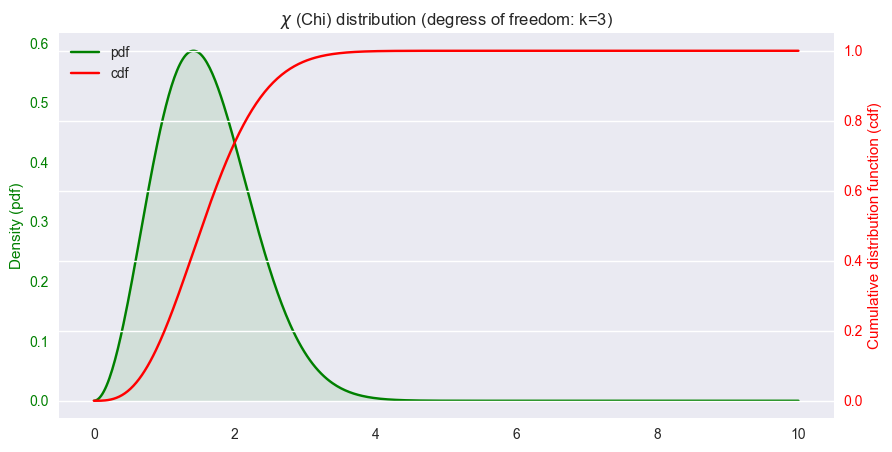

In [21]:
# Parameters for the chi distribution
k = 3  # degrees of freedom

# Parameters for scipy.stats.chi
df = k

# Characteristics of the chi distribution
print("mean =", np.round(stats.chi.mean(df), 3))
print("variance =", np.round(stats.chi.var(df), 3))
print("standard deviation =", np.round(stats.chi.std(df), 3))
print("skewness =", np.round(stats.chi.stats(df, moments='s'), 3))
print("kurtosis =", np.round(stats.chi.stats(df, moments='k'), 3))
print("entropy =", np.round(stats.chi.entropy(df), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(sqrt(2) * (sp_gamma((k + 1) / 2) / sp_gamma(k / 2)), 3))
print("variance =", np.round(k - 2 * (sp_gamma((k + 1) / 2) / sp_gamma(k / 2))**2, 3))
print("standard deviation =", np.round(sqrt(k - 2 * (sp_gamma((k + 1) / 2) / sp_gamma(k / 2))**2), 3))

# Plots of pdf and cdf
x = np.linspace(0, 10, 500)
pdf = stats.chi.pdf(x, df)
cdf = stats.chi.cdf(x, df)
plot_continuous(
    f"$\\chi$ (Chi) distribution (degress of freedom: k={k})", x, pdf, cdf)

### Cosine distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Cosine&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine)
* [Wikipedia](https://en.wikipedia.org/wiki/Raised_cosine_distribution)

mean = 7.5
variance = 0.817
standard deviation = 0.904
skewness = 0.0
kurtosis = -0.594
entropy = 1.303
mean = 7.5
variance = 0.817
standard deviation = 0.904


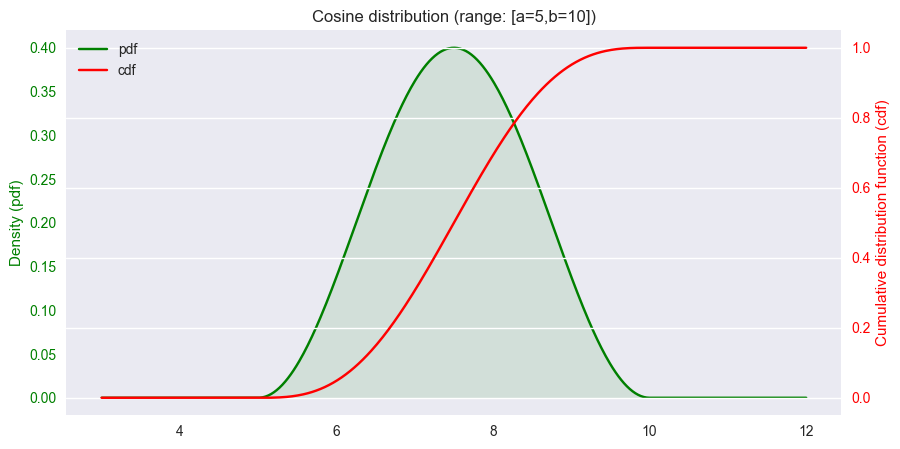

In [22]:
# Parameters for the cosine distribution
a = 5  # lower bound
b = 10  # upper bound

# Parameters for scipy.stats.cosine
loc = (a + b) / 2
scale = 1 / 2 / pi * (b - a)

# Characteristics of the cosine distribution
print("mean =", np.round(stats.cosine.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.cosine.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.cosine.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.cosine.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.cosine.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.cosine.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((a + b) / 2, 3))
print("variance =", np.round((pi**2 - 6) * (b - a) ** 2 / 12 / pi**2, 3))
print("standard deviation =", np.round(sqrt((pi**2 - 6) * (b - a) ** 2 / 12 / pi**2), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.cosine.pdf(x, loc=loc, scale=scale)
cdf = stats.cosine.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Cosine distribution (range: [a={a},b={b}])", x, pdf, cdf)

### Erlang distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Erlang&n=4&lambda=2.5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.erlang.html#scipy.stats.erlang)
* [Wikipedia](https://en.wikipedia.org/wiki/Erlang_distribution)

mean = 10.0
variance = 25.0
standard deviation = 5.0
skewness = 1.0
kurtosis = 1.5
entropy = 2.94
mean = 10.0
variance = 25.0
standard deviation = 5.0


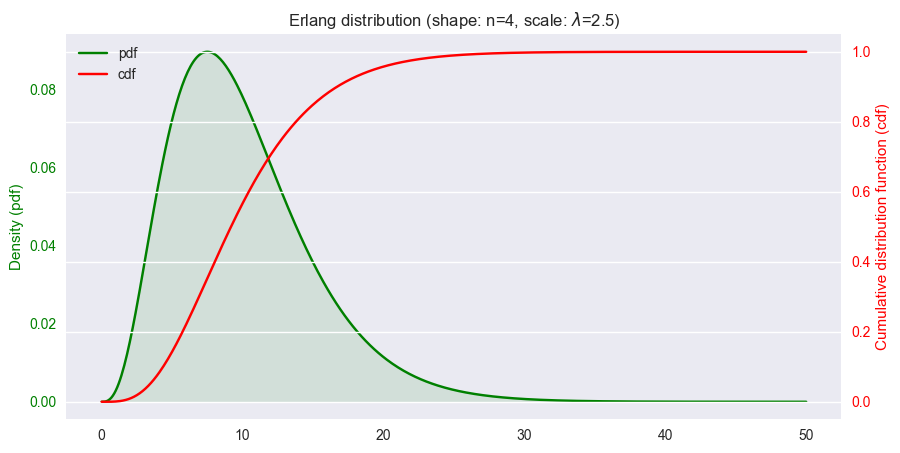

In [23]:
# Parameters for the Erlang distribution
n = 4  # shape parameter (n)
lmbda = 2.5  # scale parameter (lambda)

# Parameters for scipy.stats.erlang
a = n
scale = lmbda

# Characteristics of the Erlang distribution
print("mean =", np.round(stats.erlang.mean(a, scale=scale), 3))
print("variance =", np.round(stats.erlang.var(a, scale=scale), 3))
print("standard deviation =", np.round(stats.erlang.std(a, scale=scale), 3))
print("skewness =", np.round(stats.erlang.stats(a, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.erlang.stats(a, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.erlang.entropy(a, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(n * lmbda, 3))
print("variance =", np.round(n * (lmbda ** 2), 3))
print("standard deviation =", np.round(sqrt(n) * lmbda, 3))

# Plots of pdf and cdf
x = np.linspace(0, 50, 500)
pdf = stats.erlang.pdf(x, a, scale=scale)
cdf = stats.erlang.cdf(x, a, scale=scale)
plot_continuous(f"Erlang distribution (shape: n={n}, scale: $\\lambda$={lmbda})", x, pdf, cdf)

### Exponential distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Exponential&lambda=2)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon)
* [Wikipedia](https://en.wikipedia.org/wiki/Exponential_distribution)

mean = 0.5
variance = 0.25
standard deviation = 0.5
skewness = 2.0
kurtosis = 6.0
entropy = 0.307
mean = 0.5
variance = 0.25
standard deviation = 0.5


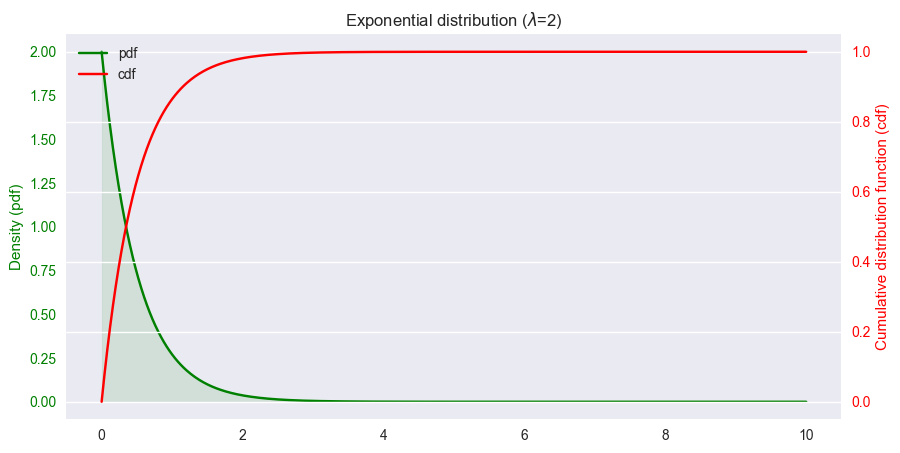

In [24]:
# Parameters for the exponential distribution
lmbda = 2  # lambda parameter

# Parameters for the scipy.stats.expon
# The scale parameter is the inverse of lambda (1/lambda)
scale = 1 / lmbda

# Characteristics of the exponential distribution
print("mean =", np.round(stats.expon.mean(scale=scale), 3))
print("variance =", np.round(stats.expon.var(scale=scale), 3))
print("standard deviation =", np.round(stats.expon.std(scale=scale), 3))
print("skewness =", np.round(stats.expon.stats(scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.expon.stats(scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.expon.entropy(scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(1 / lmbda, 3))
print("variance =", np.round(1 / (lmbda ** 2), 3))
print("standard deviation =", np.round(1 / lmbda, 3))

# Plots of pdf and cdf
x = np.linspace(0, 10, 500)
pdf = stats.expon.pdf(x, scale=scale)
cdf = stats.expon.cdf(x, scale=scale)
plot_continuous(f"Exponential distribution ($\\lambda$={lmbda})", x, pdf, cdf)

### F distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=F&m=10&n=5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html#scipy.stats.f)
* [Wikipedia](https://en.wikipedia.org/wiki/F-distribution)

mean = 1.667
variance = 7.222
standard deviation = 2.687
skewness = nan
kurtosis = nan
entropy = 1.35
mean = 1.667
variance = 7.222
standard deviation = 2.687


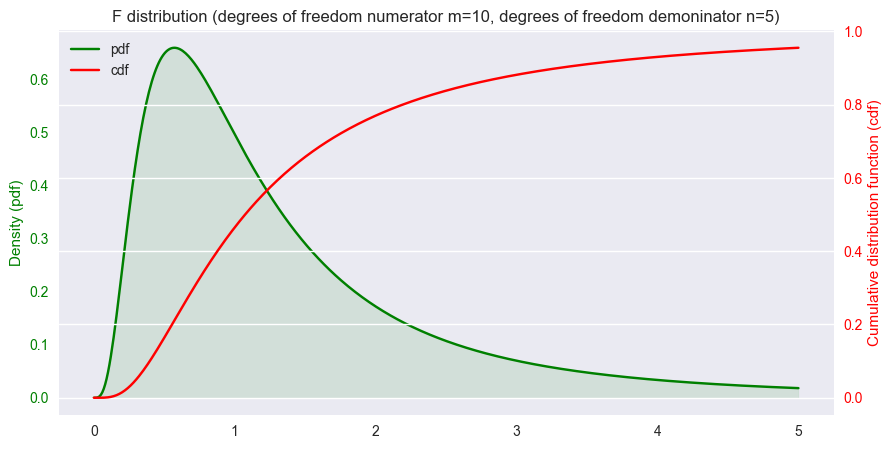

In [25]:
# Parameters for the F distribution
m = 10  # degrees of freedom numerator
n = 5   # degrees of freedom denominator

# Parameters for scipy.stats.f
dfn = m
dfd = n

# Characteristics of the F distribution
print("mean =", np.round(stats.f.mean(dfn, dfd), 3))
print("variance =", np.round(stats.f.var(dfn, dfd), 3))
print("standard deviation =", np.round(stats.f.std(dfn, dfd), 3))
print("skewness =", np.round(stats.f.stats(dfn, dfd, moments='s'), 3))
print("kurtosis =", np.round(stats.f.stats(dfn, dfd, moments='k'), 3))
print("entropy =", np.round(stats.f.entropy(dfn, dfd), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(n / (n - 2), 3) if n > 2 else "undefined")
print("variance =", np.round((2 * n**2 * (m + n - 2)) / (m * (n - 2)**2 * (n - 4)), 3) if n > 4 else "undefined")
print("standard deviation =", np.round(sqrt((2 * n**2 * (m + n - 2)) / (m * (n - 2)**2 * (n - 4))), 3) if n > 4 else "undefined")

# Plots of pdf and cdf
x = np.linspace(0, 5, 500)
pdf = stats.f.pdf(x, dfn, dfd)
cdf = stats.f.cdf(x, dfn, dfd)
plot_continuous(f"F distribution (degrees of freedom numerator m={m}, degrees of freedom demoninator n={n})", x, pdf, cdf)

### Fatigue life distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=FatigueLife&mu=3&beta=5&gamma=1)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fatiguelife.html#scipy.stats.fatiguelife)
* [Wikipedia](https://en.wikipedia.org/wiki/Birnbaum%E2%80%93Saunders_distribution)

mean = 10.5
variance = 56.25
standard deviation = 7.5
skewness = 2.519
kurtosis = 9.852
entropy = 2.932
mean = 10.5
variance = 56.25
standard deviation = 7.5


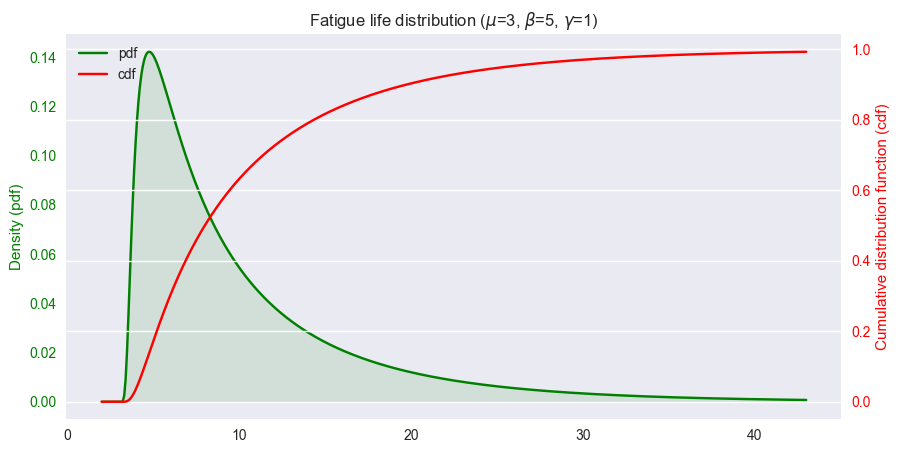

In [26]:
# Parameters for the fatigue life distribution
mu = 3  # location parameter
beta = 5  # scale parameter
gamma = 1  # form parameter

# Parameters for scipy.stats.fatiguelife
c = gamma
scale = beta
loc = mu

# Characteristics of the fatigue life distribution
print("mean =", np.round(stats.fatiguelife.mean(c, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.fatiguelife.var(c, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.fatiguelife.std(c, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.fatiguelife.stats(c, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.fatiguelife.stats(c, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.fatiguelife.entropy(c, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(mu + beta * (1 + gamma**2 / 2), 3))
print("variance =", np.round(beta**2 * (gamma**2) * (1 + 5 * gamma**2 / 4), 3))
print("standard deviation =", np.round(sqrt(beta**2 * (gamma**2) * (1 + 5 * gamma**2 / 4)), 3))

# Plots of pdf and cdf
x = np.linspace(mu - 1, mu + 40, 500)
pdf = stats.fatiguelife.pdf(x, c, loc=loc, scale=scale)
cdf = stats.fatiguelife.cdf(x, c, loc=loc, scale=scale)
plot_continuous(f"Fatigue life distribution ($\\mu$={mu}, $\\beta$={beta}, $\\gamma$={gamma})", x, pdf, cdf)

### Fréchet distribution (Inverse Weibull distribution)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Frechet&delta=1&beta=5&alpha=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invweibull.html#scipy.stats.invweibull)
* [Wikipedia](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)

mean = 7.771
variance = 21.133
standard deviation = 4.597
skewness = inf
kurtosis = -inf
entropy = 2.28
mean = 7.771
variance = 21.133
standard deviation = 4.597


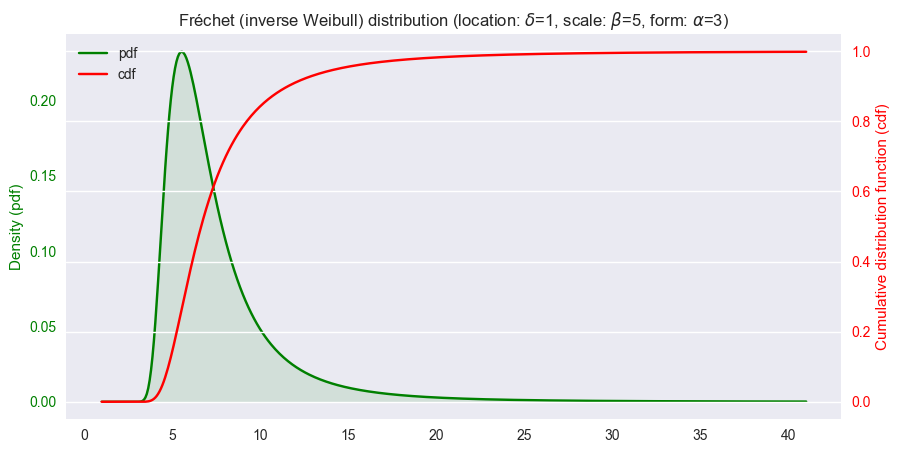

In [27]:
# Parameters for the Fréchet (inverse Weibull) distribution
delta = 1  # location parameter
beta = 5   # scale parameter
alpha = 3  # form parameter

# Parameters for scipy.stats.invweibull
c = alpha
scale = beta
loc = delta

# Characteristics of the Fréchet (inverse Weibull) distribution
print("mean =", np.round(stats.invweibull.mean(c, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.invweibull.var(c, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.invweibull.std(c, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.invweibull.stats(c, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.invweibull.stats(c, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.invweibull.entropy(c, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(delta + beta * sp_gamma(1 - 1 / alpha), 3))
print("variance =", np.round(beta**2 * (sp_gamma(1 - 2 / alpha) - (sp_gamma(1 - 1 / alpha))**2), 3))
print("standard deviation =", np.round(sqrt(beta**2 * (sp_gamma(1 - 2 / alpha) - (sp_gamma(1 - 1 / alpha))**2)), 3))

# Plots of pdf and cdf
x = np.linspace(delta, delta + 40, 500)
pdf = stats.invweibull.pdf(x, c, loc=loc, scale=scale)
cdf = stats.invweibull.cdf(x, c, loc=loc, scale=scale)
plot_continuous(f"Fréchet (inverse Weibull) distribution (location: $\\delta$={delta}, scale: $\\beta$={beta}, form: $\\alpha$={alpha})", x, pdf, cdf)

### Gamma distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Gamma&alpha=4&beta=2.5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma)
* [Wikipedia](https://en.wikipedia.org/wiki/Gamma_distribution)

mean = 10.0
variance = 25.0
standard deviation = 5.0
skewness = 1.0
kurtosis = 1.5
entropy = 2.94
mean = 10.0
variance = 25.0
standard deviation = 5.0


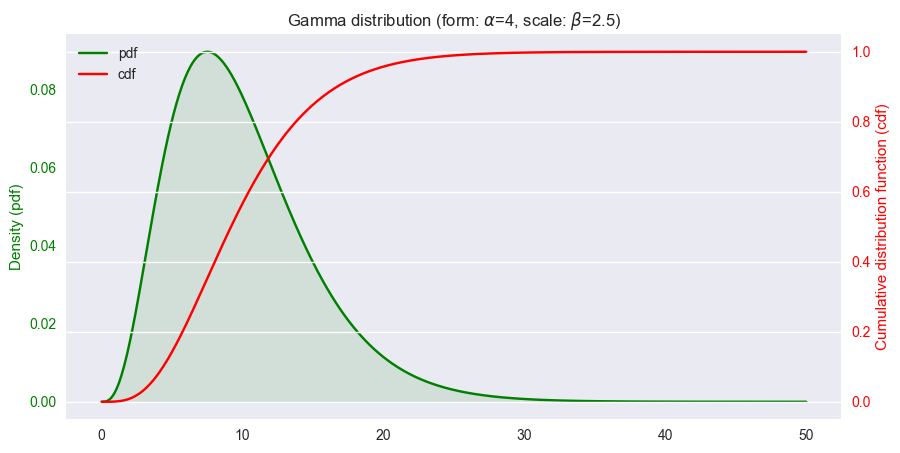

In [28]:
# Parameters for the gamma distribution
alpha = 4   # form parameter
beta = 2.5  # scale parameter

# Parameters for scipy.stats.gamma
a = alpha
scale = beta

# Characteristics of the gamma distribution
print("mean =", np.round(stats.gamma.mean(a, scale=scale), 3))
print("variance =", np.round(stats.gamma.var(a, scale=scale), 3))
print("standard deviation =", np.round(stats.gamma.std(a, scale=scale), 3))
print("skewness =", np.round(stats.gamma.stats(a, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.gamma.stats(a, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.gamma.entropy(a, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(alpha * beta, 3))
print("variance =", np.round(alpha * (beta ** 2), 3))
print("standard deviation =", np.round(sqrt(alpha) * beta, 3))

# Plots of pdf and cdf
x = np.linspace(0, 50, 500)
pdf = stats.gamma.pdf(x, a, scale=scale)
cdf = stats.gamma.cdf(x, a, scale=scale)
plot_continuous(f"Gamma distribution (form: $\\alpha$={alpha}, scale: $\\beta$={beta})", x, pdf, cdf)

### Gumbel distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Gumbel&mean=5&std=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html#scipy.stats.gumbel_r)
* [Wikipedia](https://en.wikipedia.org/wiki/Gumbel_distribution)

mean = 4.998
variance = 9.0
standard deviation = 3.0
skewness = 1.14
kurtosis = 2.4
entropy = 2.427


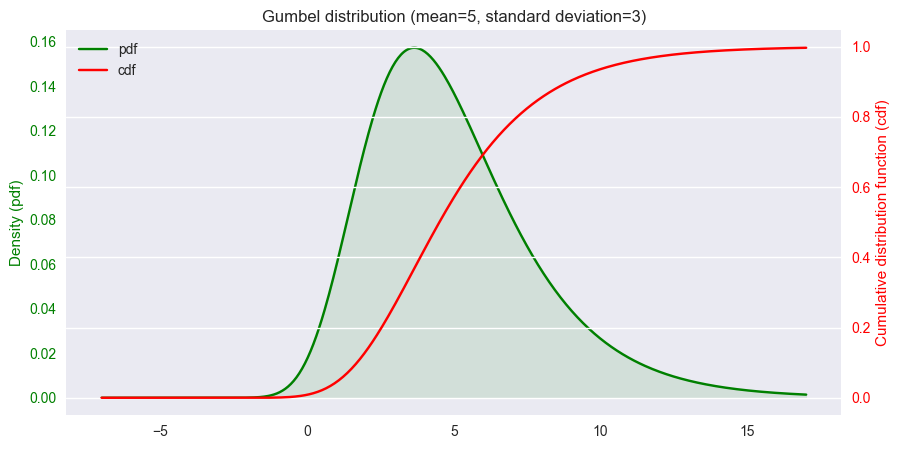

In [29]:
# Parameters for the Gumbel distribution
mean = 5
std = 3

# Parameters for scipy.stats.gumbel_r
scale = std * sqrt(6) / np.pi  # beta
loc = mean - scale * pi / 2 / exp(1)  # mu (pi/2/e is a approximation of the Euler-Mascheroni constant)

# Characteristics of the Gumbel distribution
print("mean =", np.round(stats.gumbel_r.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.gumbel_r.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.gumbel_r.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.gumbel_r.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.gumbel_r.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.gumbel_r.entropy(loc=loc, scale=scale), 3))

# Plots of pdf and cdf
x = np.linspace(mean - 4 * std, mean + 4 * std, 500)
pdf = stats.gumbel_r.pdf(x, loc=loc, scale=scale)
cdf = stats.gumbel_r.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Gumbel distribution (mean={mean}, standard deviation={std})", x, pdf, cdf)

### Half Cauchy-Distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=HalfCauchy&mu=0&sigma=3)
* [SciPy documentation](https://distribution-explorer.github.io/continuous/halfcauchy.html)
* No Wikipedia page available

mean = inf
variance = inf
standard deviation = inf
skewness = nan
kurtosis = nan
entropy = 2.936


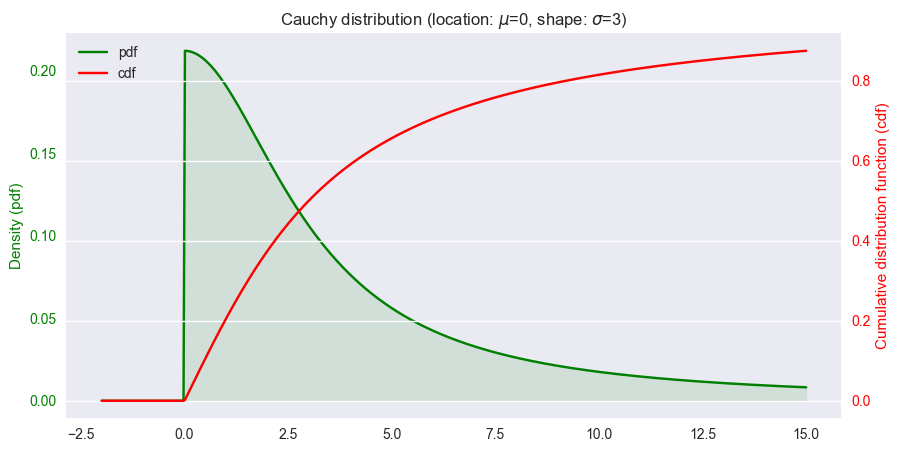

In [30]:
# Parameters for the half Cauchy distribution
mu = 0  # location
sigma = 3  # scale

# Parameters for scipy.stats.halfcauchy
loc = mu
scale = sigma

# Characteristics of the Cauchy distribution
print("mean =", np.round(stats.halfcauchy.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.halfcauchy.var(loc=loc, scale=scale), 3))
print("standard deviation =", stats.halfcauchy.std(loc=loc, scale=scale))
print("skewness =", np.round(stats.halfcauchy.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.halfcauchy.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.halfcauchy.entropy(loc=loc, scale=scale), 3))

# Plots of pdf and cdf
x = np.linspace(mu - 2, mu + 5 * sigma, 500)
pdf = stats.halfcauchy.pdf(x, loc=loc, scale=scale)
cdf = stats.halfcauchy.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Cauchy distribution (location: $\mu$={mu}, shape: $\sigma$={sigma})", x, pdf, cdf)

### Half-normal distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=HalfNormal&s=5&mu=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.halfnorm.html#scipy.stats.halfnorm)
* [Wikipedia](https://en.wikipedia.org/wiki/Half-normal_distribution)

mean = 15.0
variance = 57.08
standard deviation = 7.555
skewness = 0.995
kurtosis = 0.869
entropy = 3.254
mean = 15
variance = 57.08
standard deviation = 7.555


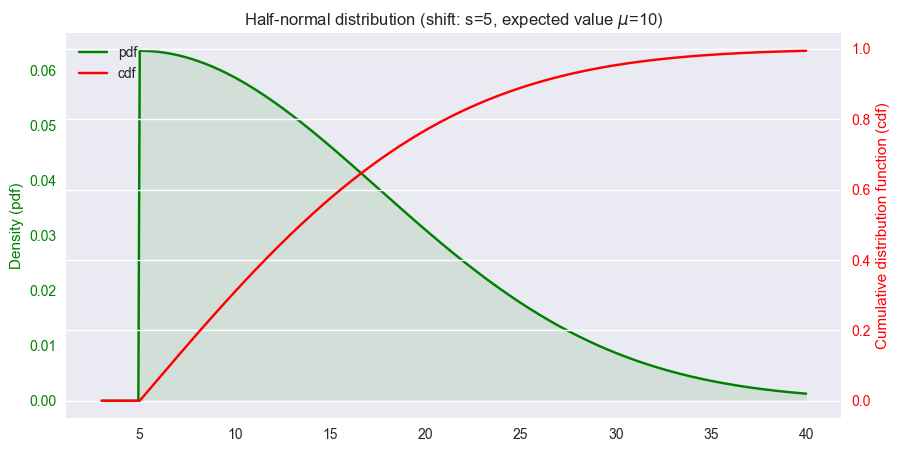

In [31]:
# Parameters for the half-normal distribution
s = 5    # shift
mu = 10  # expected value

# Parameters for scipy.stats.halfnorm
loc = s
scale = mu * sqrt(pi / 2)

# Characteristics of the half-normal distribution
print("mean =", np.round(stats.halfnorm.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.halfnorm.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.halfnorm.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.halfnorm.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.halfnorm.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.halfnorm.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(s + mu, 3))
print("variance =", np.round(mu**2 * (pi - 2) / 2, 3))
print("standard deviation =", np.round(mu * sqrt((pi - 2) / 2), 3))

# Plots of pdf and cdf
x = np.linspace(s - 2, 4 * mu, 500)
pdf = stats.halfnorm.pdf(x, loc=loc, scale=scale)
cdf = stats.halfnorm.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Half-normal distribution (shift: s={s}, expected value $\\mu$={mu})", x, pdf, cdf)

### Hyperbolic secant distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=HyperbolicSecant&mu=5&sigma=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypsecant.html#scipy.stats.hypsecant)
* [Wikipedia](https://en.wikipedia.org/wiki/Hyperbolic_secant_distribution)

mean = 5.0
variance = 9.0
standard deviation = 3.0
skewness = 0.0
kurtosis = 2.0
entropy = 2.485
mean = 5
variance = 9
standard deviation = 3


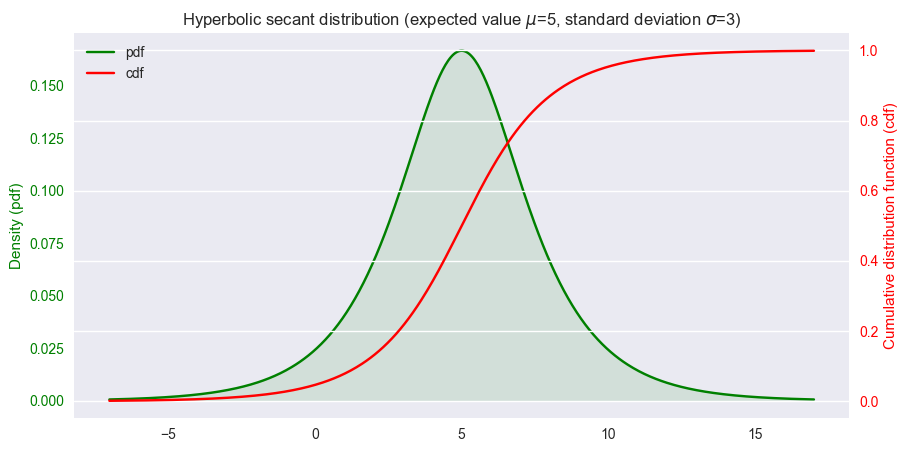

In [32]:
# Parameters for the hyperbolic secant distribution
mu = 5  # location (expected value)
sigma = 3  # scaling (standard deviation)

# Parameters for scipy.stats.hypsecant
loc = mu
scale = sigma / sqrt(pi**2 / 4)

# Characteristics of the hyperbolic secant distribution
print("mean =", np.round(stats.hypsecant.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.hypsecant.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.hypsecant.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.hypsecant.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.hypsecant.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.hypsecant.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(mu, 3))
print("variance =", np.round(sigma**2, 3))
print("standard deviation =", np.round(sigma, 3))

# Plots of pdf and cdf
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 500)
pdf = stats.hypsecant.pdf(x, loc=loc, scale=scale)
cdf = stats.hypsecant.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Hyperbolic secant distribution (expected value $\\mu$={mu}, standard deviation $\\sigma$={sigma})", x, pdf, cdf)

### Inverse gamma distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=InverseGamma&alpha=3&beta=200)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invgamma.html#scipy.stats.invgamma)
* [Wikipedia](https://en.wikipedia.org/wiki/Inverse-gamma_distribution)

mean = 100.0
variance = 10000.0
standard deviation = 100.0
skewness = nan
kurtosis = nan
entropy = 5.3
mean = 100.0
variance = 10000.0
standard deviation = 100.0


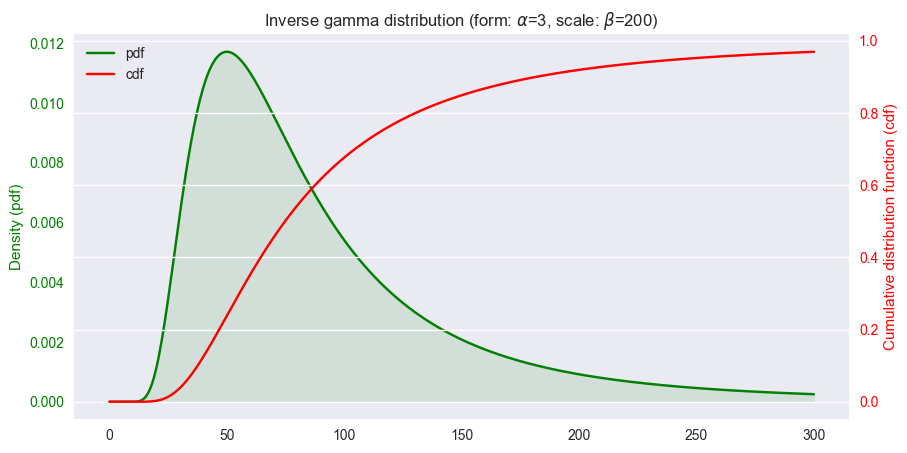

In [33]:
# Parameters for the inverse gamma distribution
alpha = 3  # form parameter
beta = 200  # scale parameter

# Parameters for scipy.stats.invgamma
a = alpha
scale = beta

# Characteristics of the inverse gamma distribution
print("mean =", np.round(stats.invgamma.mean(a, scale=scale), 3))
print("variance =", np.round(stats.invgamma.var(a, scale=scale), 3))
print("standard deviation =", np.round(stats.invgamma.std(a, scale=scale), 3))
print("skewness =", np.round(stats.invgamma.stats(a, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.invgamma.stats(a, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.invgamma.entropy(a, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(beta / (alpha - 1), 3) if alpha > 1 else "undefined")
print("variance =", np.round(beta**2 / ((alpha - 1)**2 * (alpha - 2)), 3) if alpha > 2 else "undefined")
print("standard deviation =", np.round(beta / (alpha - 1) / sqrt(alpha - 2), 3) if alpha > 2 else "undefined")

# Plots of pdf and cdf
x = np.linspace(0, 300, 500)
pdf = stats.invgamma.pdf(x, a, scale=scale)
cdf = stats.invgamma.cdf(x, a, scale=scale)
plot_continuous(f"Inverse gamma distribution (form: $\\alpha$={alpha}, scale: $\\beta$={beta})", x, pdf, cdf)

### Inverse Gauß distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=HalfNormal&s=5&mu=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invgauss.html#scipy.stats.invgauss)
* [Wikipedia](https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution)

mean = 5.0
variance = 31.25
standard deviation = 5.59
skewness = 3.354
kurtosis = 18.75
entropy = 2.499
mean = 5
variance = 31.25
standard deviation = 5.59


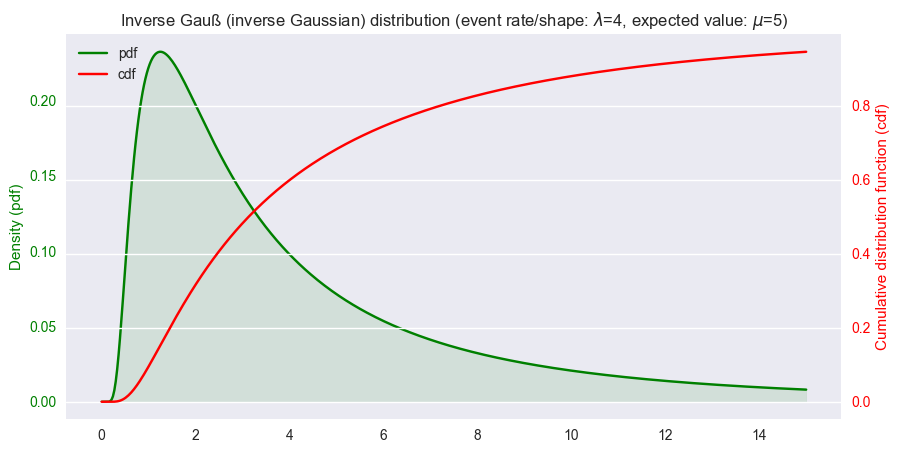

In [34]:
# Parameters for the inverse Gauß (inverse Gaussian) distribution
lmbda = 4  # event rate (shape parameter)
mu = 5  # expected value

# Parameters for scipy.stats.invgauss
shape = mu / lmbda
scale = lmbda

# Characteristics of the inverse Gauß distribution
print("mean =", np.round(stats.invgauss.mean(shape, scale=scale), 3))
print("variance =", np.round(stats.invgauss.var(shape, scale=scale), 3))
print("standard deviation =", np.round(stats.invgauss.std(shape, scale=scale), 3))
print("skewness =", np.round(stats.invgauss.stats(shape, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.invgauss.stats(shape, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.invgauss.entropy(shape, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(mu, 3))
print("variance =", np.round(mu**3 / lmbda, 3))
print("standard deviation =", np.round(np.sqrt(mu**3 / lmbda), 3))

# Plots of pdf and cdf
x = np.linspace(0, 15, 500)
pdf = stats.invgauss.pdf(x, shape, scale=scale)
cdf = stats.invgauss.cdf(x, shape, scale=scale)
plot_continuous(f"Inverse Gauß (inverse Gaussian) distribution (event rate/shape: $\\lambda$={lmbda}, expected value: $\\mu$={mu})", x, pdf, cdf)

### Irwin-Hall distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=HalfNormal&s=5&mu=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.irwinhall.html#scipy.stats.irwinhall)
* [Wikipedia](https://en.wikipedia.org/wiki/Irwin%E2%80%93Hall_distribution)

mean = 4.0
variance = 0.667
standard deviation = 0.816
skewness = 0.0
kurtosis = -0.15
entropy = 1.216
mean = 4.0
variance = 0.667
standard deviation = 0.816


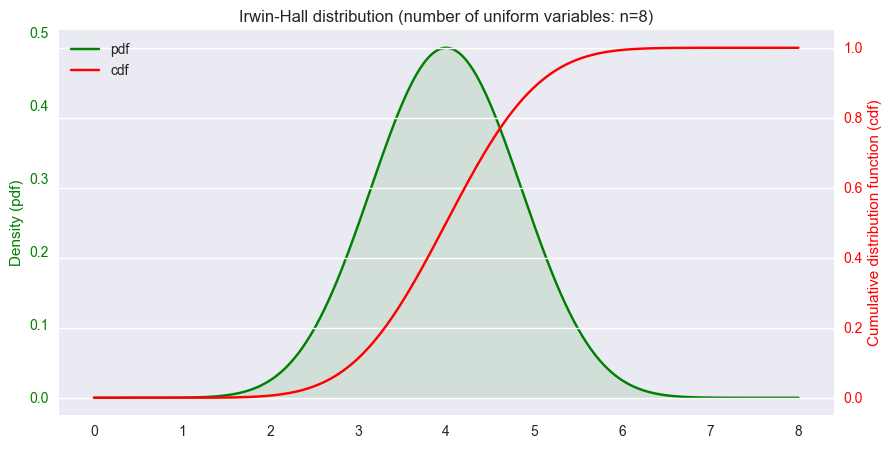

In [35]:
# Parameters for the Irwin-Hall distribution
n = 8  # number of uniform variables

# Parameters for scipy.stats.irwinhall
n = n

# Characteristics of the Irwin-Hall distribution
print("mean =", np.round(stats.irwinhall.mean(n), 3))
print("variance =", np.round(stats.irwinhall.var(n), 3))
print("standard deviation =", np.round(stats.irwinhall.std(n), 3))
print("skewness =", np.round(stats.irwinhall.stats(n, moments='s'), 3))
print("kurtosis =", np.round(stats.irwinhall.stats(n, moments='k'), 3))
print("entropy =", np.round(stats.irwinhall.entropy(n), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(n / 2, 3))
print("variance =", np.round(n / 12, 3))
print("standard deviation =", np.round(sqrt(n / 12), 3))

# Plots of pdf and cdf
x = np.linspace(0, n, 500)
pdf = stats.irwinhall.pdf(x, n)
cdf = stats.irwinhall.cdf(x, n)
plot_continuous(f"Irwin-Hall distribution (number of uniform variables: n={n})", x, pdf, cdf)

### Johnson SU distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=HalfNormal&s=5&mu=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.johnsonsu.html#scipy.stats.johnsonsu)
* [Wikipedia](https://en.wikipedia.org/wiki/Johnson%27s_SU-distribution)

mean = 40.203
variance = 6463.444
standard deviation = 80.396
skewness = -6.084
kurtosis = 108.191
entropy = 5.114
mean = 40.203
variance = 6463.444
standard deviation = 80.396


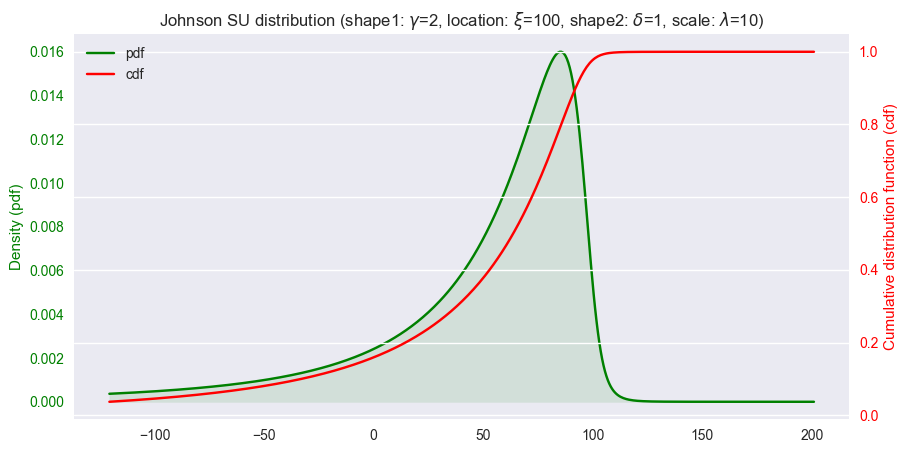

In [36]:
# Parameters for the Johnson SU distribution
gamma = 2  # shape parameter (gamma)
xi = 100  # location parameter (xi)
delta = 1  # shape parameter (delta)
lmbda = 10  # scale parameter (lambda)

# Parameters for scipy.stats.johnsonsu
a = gamma
b = delta
loc = xi
scale = lmbda

# Characteristics of the Johnson SU distribution
print("mean =", np.round(stats.johnsonsu.mean(a, b, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.johnsonsu.var(a, b, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.johnsonsu.std(a, b, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.johnsonsu.stats(a, b, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.johnsonsu.stats(a, b, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.johnsonsu.entropy(a, b, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(xi - lmbda * exp(1 / (2 * delta**2)) * sinh(gamma / delta), 3))
print("variance =", np.round(lmbda**2 / 2 * (exp(1 / (delta**2)) - 1) * (exp(1 / (delta**2)) * cosh(2 * gamma * delta) + 1), 3))
print("standard deviation =", np.round(sqrt(lmbda**2 / 2 * (exp(1 / (delta**2)) - 1) * (exp(1 / (delta**2)) * cosh(2 * gamma * delta) + 1)), 3))

# Plots of pdf and cdf
mean = xi - lmbda * exp(1 / (2 * delta**2)) * sinh(gamma / delta)
ex = exp(1 / (delta**2))
variance = lmbda**2 / 2 * (ex - 1) * (ex * cosh(2 * gamma * delta) + 1)
x = np.linspace(mean - 2 * sqrt(variance), mean + 2 * sqrt(variance), 500)
pdf = stats.johnsonsu.pdf(x, a, b, loc=loc, scale=scale)
cdf = stats.johnsonsu.cdf(x, a, b, loc=loc, scale=scale)
plot_continuous(f"Johnson SU distribution (shape1: $\\gamma$={gamma}, location: $\\xi$={xi}, shape2: $\\delta$={delta}, scale: $\\lambda$={lmbda})", x, pdf, cdf)

### Kumaraswamy distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/index_de.html?distribution=Kumaraswamy&a=4&b=2.5)
* [Wikipedia](https://en.wikipedia.org/wiki/Kumaraswamy_distribution)

Kumaraswamy distribution is not implemented in SciPy.

### Laplace distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Laplace&mu=0&sigma=1)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace)
* [Wikipedia](https://en.wikipedia.org/wiki/Laplace_distribution)

mean = 0.0
variance = 2.0
standard deviation = 1.414
skewness = 0.0
kurtosis = 3.0
entropy = 1.693
mean = 0
variance = 2
standard deviation = 1.414


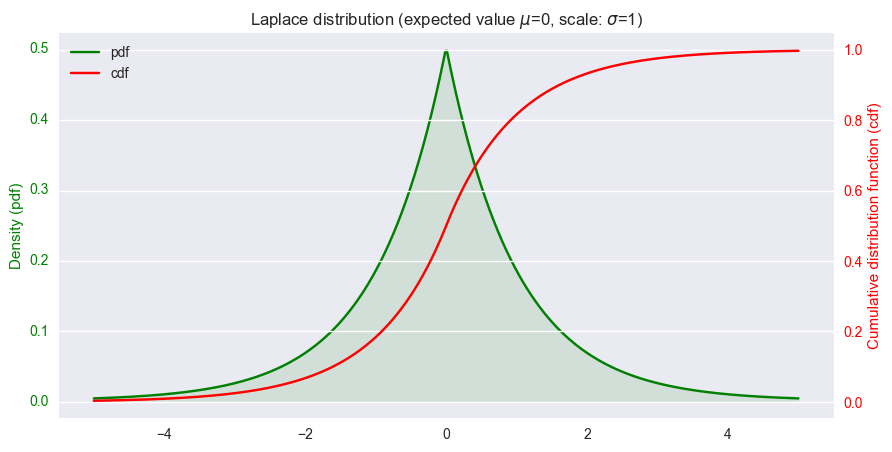

In [37]:
# Parameters for the Laplace distribution
mu = 0  # location parameter
sigma = 1  # scale parameter

# Parameters for scipy.stats.laplace
loc = mu
scale = sigma

# Characteristics of the Laplace distribution
print("mean =", np.round(stats.laplace.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.laplace.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.laplace.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.laplace.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.laplace.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.laplace.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(mu, 3))
print("variance =", np.round(2 * sigma**2, 3))
print("standard deviation =", np.round(sqrt(2) * sigma, 3))

# Plots of pdf and cdf
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 500)
pdf = stats.laplace.pdf(x, loc=loc, scale=scale)
cdf = stats.laplace.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Laplace distribution (expected value $\\mu$={mu}, scale: $\\sigma$={sigma})", x, pdf, cdf)

### Left sawtooth distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=SawtoothLeft&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang)
* [Wikipedia](https://en.wikipedia.org/wiki/Triangular_distribution)

mean = 6.667
variance = 1.389
standard deviation = 1.179
skewness = 0.566
kurtosis = -0.6
entropy = 1.416
mean = 5.0
variance = 4.167
standard deviation = 2.041


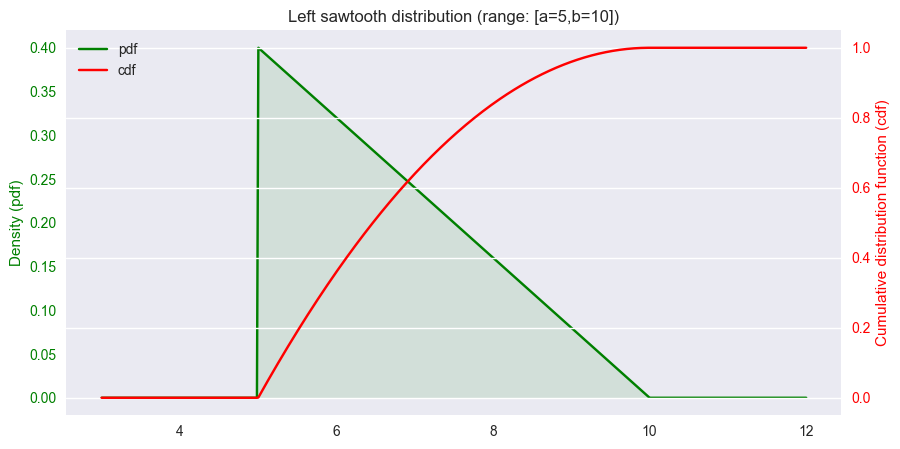

In [38]:
# Parameters for the left sawtooth distribution
a = 5   # lower bound
b = 10  # upper bound

# For scipy.stats.triang, a is the mode location, interval is [a, b]
c = 0
loc = a
scale = b - a

# Characteristics of the left sawtooth distribution
print("mean =", np.round(stats.triang.mean(c, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.triang.var(c, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.triang.std(c, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.triang.stats(c, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.triang.stats(c, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.triang.entropy(c, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((a + b + c) / 3, 3))
print("variance =", np.round((a**2 + b**2 + c**2 - a * b - a * c - b * c) / 18, 3))
print("standard deviation =", np.round(sqrt((a**2 + b**2 + c**2 - a * b - a * c - b * c) / 18), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.triang.pdf(x, c, loc=loc, scale=scale)
cdf = stats.triang.cdf(x, c, loc=loc, scale=scale)
plot_continuous(f"Left sawtooth distribution (range: [a={a},b={b}])", x, pdf, cdf)

### Log-Cauchy distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=LogCauchy&mu=4&sigma=0.5)
* [Wikipedia](https://en.wikipedia.org/wiki/Log-Cauchy_distribution)

Log-Cauchy distribution is not implemented in SciPy.

### Log-Laplace distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=LogLaplace&s=5&c=2.5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loglaplace.html#scipy.stats.loglaplace)
* [Wikipedia](https://en.wikipedia.org/wiki/Log-Laplace_distribution)
* [Paper discussing the characteristics](https://www.researchgate.net/publication/259481526_Log-Laplace_distributions)

mean = 6.19
variance = 1.361
standard deviation = 1.166
skewness = inf
kurtosis = nan
entropy = 0.777
mean = 6.19
variance = 1.361
standard deviation = 1.166


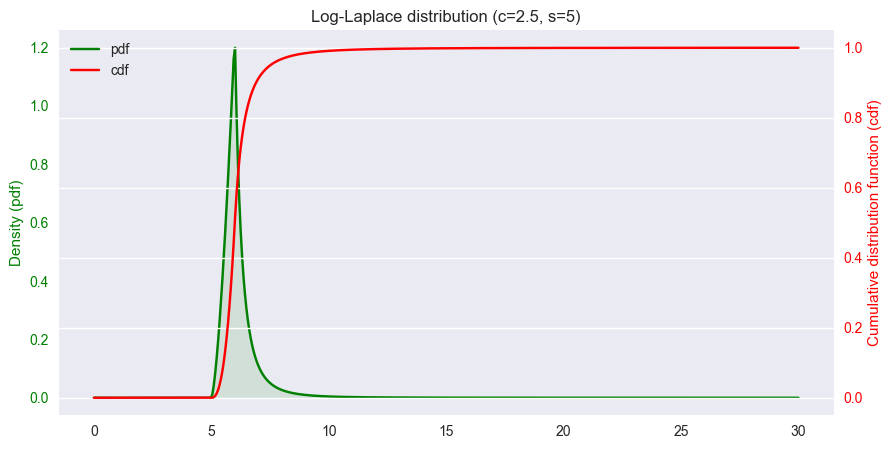

In [40]:
# Parameters for the log-laplace distribution
s = 5  # shift parameter
c = 2.5  # shape parameter

# Parameters for scipy.stats.loglaplace
c = c
loc = s

# Characteristics of the Log-Laplace distribution
print("mean =", np.round(stats.loglaplace.mean(c, loc=loc), 3))
print("variance =", np.round(stats.loglaplace.var(c, loc=loc), 3))
print("standard deviation =", np.round(stats.loglaplace.std(c, loc=loc), 3))
print("skewness =", np.round(stats.loglaplace.stats(c, loc=loc, moments='s'), 3))
print("kurtosis =", np.round(stats.loglaplace.stats(c, loc=loc, moments='k'), 3))
print("entropy =", np.round(stats.loglaplace.entropy(c, loc=loc), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(s + c**2 / (c - 1) / (c + 1), 3) if c > 1 else "undefined")
print("variance =", np.round(c**2 / (c - 2) / (c + 2) - c**4 / (c - 1)**2 / (c + 1)**2, 3) if c > 2 else "undefined")
print("standard deviation =", np.round(sqrt(c**2 / (c - 2) / (c + 2) - c**4 / (c - 1)**2 / (c + 1)**2), 3) if c > 2 else "undefined")

# Plots of pdf and cdf
x = np.linspace(s - 5, s + c * 10, 500)
pdf = stats.loglaplace.pdf(x, c, loc=loc)
cdf = stats.loglaplace.cdf(x, c, loc=loc)
plot_continuous(f"Log-Laplace distribution (c={c}, s={s})", x, pdf, cdf)

### Log-logistic distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=LogLogistic&alpha=1&beta=3)
* [Wikipedia](https://en.wikipedia.org/wiki/Log-logistic_distribution)

Log-logistic distribution is not implemented in SciPy.

### Logarithmic gamma distribution

Variant 1:
* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=LogGamma&a=5&b=4)
* [Wikipedia (de only)](https://de.wikipedia.org/wiki/Logarithmische_Gammaverteilung)

Variant 2:
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loggamma.html#scipy.stats.loggamma)

**Attention:** Wikipedia and SciPy have a different understanding what the logarithmic gamma distribution is. The distributions webapp follows the Wikipedia. The code below uses the SciPy definition.

mean = 15.061
variance = 22.132
standard deviation = 4.704
skewness = -0.469
kurtosis = 0.437
entropy = 2.95


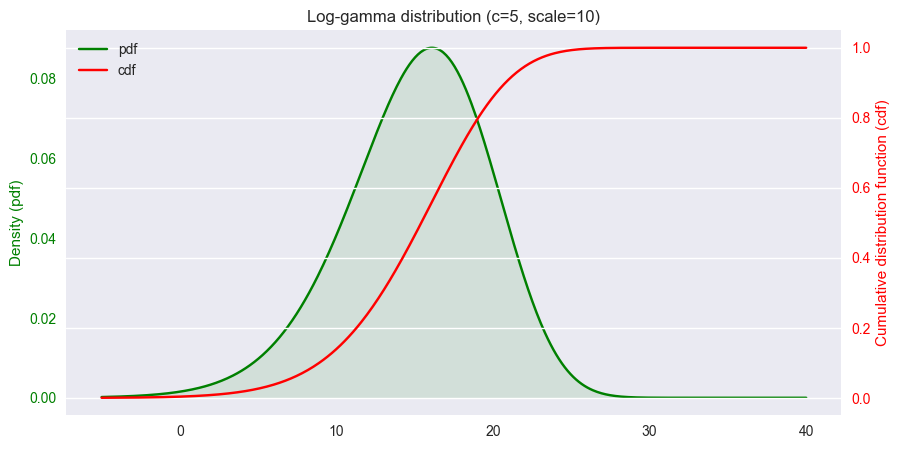

In [ ]:
# Parameters for scipy.stats.loggamma
c = 5
scale = 10

# Characteristics of the log-gamma distribution
print("mean =", np.round(stats.loggamma.mean(c, scale=scale), 3))
print("variance =", np.round(stats.loggamma.var(c, scale=scale), 3))
print("standard deviation =", np.round(stats.loggamma.std(c, scale=scale), 3))
print("skewness =", np.round(stats.loggamma.stats(c, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.loggamma.stats(c, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.loggamma.entropy(c, scale=scale), 3))

# Plots of pdf and cdf
x = np.linspace(-5, 40, 500)
pdf = stats.loggamma.pdf(x, c, scale=scale)
cdf = stats.loggamma.cdf(x, c, scale=scale)
plot_continuous(f"Log-gamma distribution (c={c}, scale={scale})", x, pdf, cdf)

### Logarithmic normal distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/index_de.html?distribution=LogNormal&mean=5&std=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm)
* [Wikipedia](https://en.wikipedia.org/wiki/Log-normal_distribution)

mean = 5.0
variance = 9.0
standard deviation = 3.0
skewness = 2.016
kurtosis = 8.001
entropy = 2.285


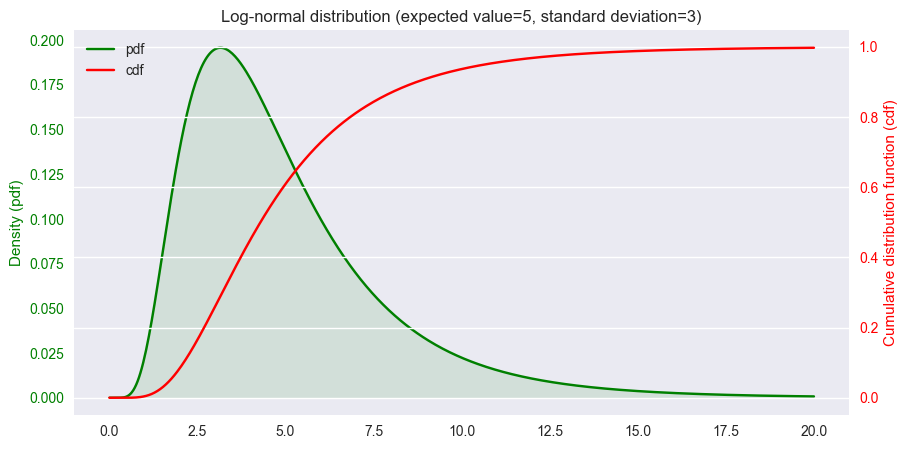

In [40]:
# Parameters for the log-normal distribution
mean = 5
std = 3

# For scipy.stats.lognorm, s is the shape parameter (stddev of log), scale=exp(mean of log)
sigma = sqrt(log(std**2 / mean**2 + 1))
mu = log(mean) - sigma**2 / 2
s = sigma
scale = exp(mu)

# Characteristics of the log-normal distribution
print("mean =", np.round(stats.lognorm.mean(s, scale=scale), 3))
print("variance =", np.round(stats.lognorm.var(s, scale=scale), 3))
print("standard deviation =", np.round(stats.lognorm.std(s, scale=scale), 3))
print("skewness =", np.round(stats.lognorm.stats(s, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.lognorm.stats(s, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.lognorm.entropy(s, scale=scale), 3))

# Plots of pdf and cdf
x = np.linspace(0, 20, 500)
pdf = stats.lognorm.pdf(x, s, scale=scale)
cdf = stats.lognorm.cdf(x, s, scale=scale)
plot_continuous(f"Log-normal distribution (expected value={mean}, standard deviation={std})", x, pdf, cdf)

### Logistic distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Logistic&mu=5&s=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html#scipy.stats.logistic)
* [Wikipedia](https://en.wikipedia.org/wiki/Logistic_distribution)

mean = 5.0
variance = 29.609
standard deviation = 5.441
skewness = 0.0
kurtosis = 1.2
entropy = 3.099
mean = 5
variance = 29.609
standard deviation = 5.441


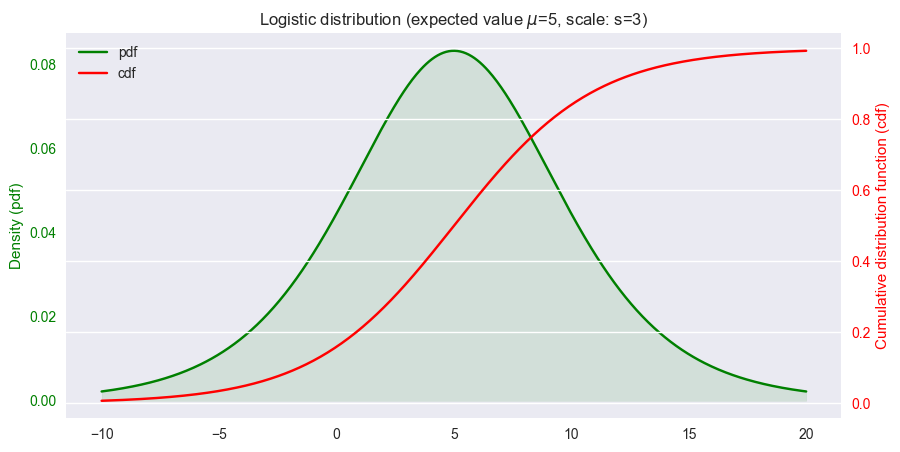

In [41]:
# Parameters for the logistic distribution
mu = 5   # location parameter
s = 3    # scale parameter

# Parameters for scipy.stats.logistic
loc = mu
scale = s

# Characteristics of the logistic distribution
print("mean =", np.round(stats.logistic.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.logistic.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.logistic.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.logistic.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.logistic.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.logistic.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(mu, 3))
print("variance =", np.round((s**2 * pi**2) / 3, 3))
print("standard deviation =", np.round(s * pi / sqrt(3), 3))

# Plots of pdf and cdf
x = np.linspace(mu - 5 * s, mu + 5 * s, 500)
pdf = stats.logistic.pdf(x, loc=loc, scale=scale)
cdf = stats.logistic.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Logistic distribution (expected value $\\mu$={mu}, scale: s={s})", x, pdf, cdf)

### Lévy distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/index_de.html?distribution=Levy&mu=5&gamma=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy.html#scipy.stats.levy)
* [Wikipedia](https://en.wikipedia.org/wiki/L%C3%A9vy_distribution)

mean = inf
variance = inf
standard deviation = inf
skewness = nan
kurtosis = nan
entropy = 4.423


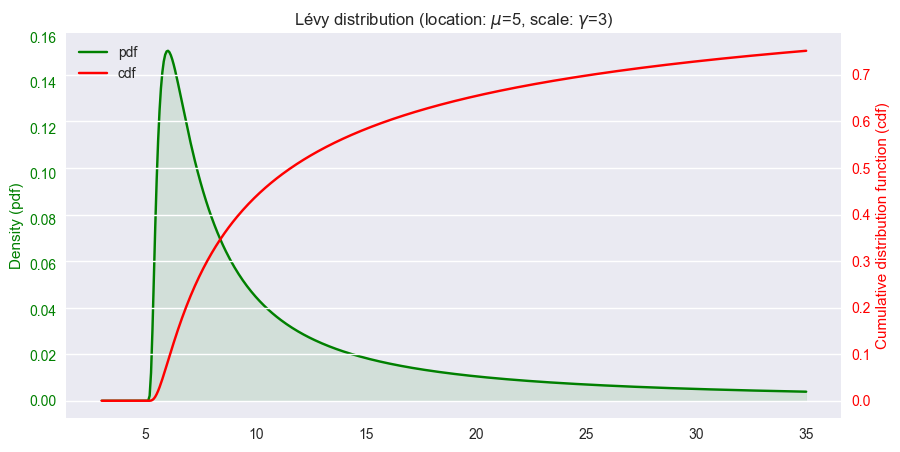

In [42]:
# Parameters for the Lévy distribution
mu = 5  # location parameter
gamma = 3  # scale parameter

# Parameters for scipy.stats.levy
loc = mu
scale = gamma

# Characteristics of the Lévy distribution
print("mean =", stats.levy.mean(loc=loc, scale=scale))  # mean is inf
print("variance =", stats.levy.var(loc=loc, scale=scale))  # variance is inf
print("standard deviation =", stats.levy.std(loc=loc, scale=scale))  # std is inf
print("skewness =", stats.levy.stats(loc=loc, scale=scale, moments='s'))  # nan
print("kurtosis =", stats.levy.stats(loc=loc, scale=scale, moments='k'))  # nan
print("entropy =", np.round(stats.levy.entropy(loc=loc, scale=scale), 3))

# Plots of pdf and cdf
x = np.linspace(mu - 2, mu + gamma * 10, 500)
pdf = stats.levy.pdf(x, loc=loc, scale=scale)
cdf = stats.levy.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Lévy distribution (location: $\\mu$={mu}, scale: $\\gamma$={gamma})", x, pdf, cdf)

### Maxwell-Boltzmann distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=MaxwellBoltzmann&a=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html#scipy.stats.maxwell)
* [Wikipedia](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution)

mean = 4.787
variance = 4.082
standard deviation = 2.02
skewness = 0.486
kurtosis = 0.108
entropy = 2.095
mean = 4.787
variance = 4.082
standard deviation = 2.02


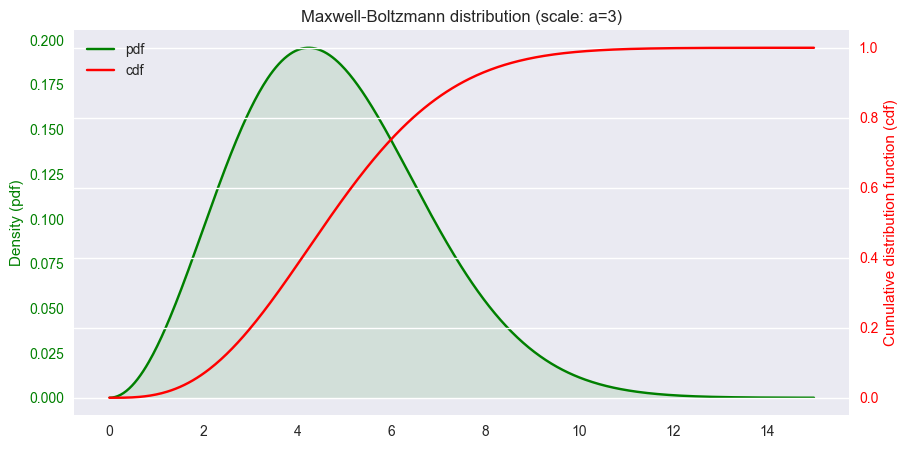

In [43]:
# Parameters for the Maxwell-Boltzmann distribution
a = 3  # scale parameter

# Parameters for scipy.stats.maxwell
scale = a

# Characteristics of the Maxwell-Boltzmann distribution
print("mean =", np.round(stats.maxwell.mean(scale=scale), 3))
print("variance =", np.round(stats.maxwell.var(scale=scale), 3))
print("standard deviation =", np.round(stats.maxwell.std(scale=scale), 3))
print("skewness =", np.round(stats.maxwell.stats(scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.maxwell.stats(scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.maxwell.entropy(scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
mean = np.round(2 * a * sqrt(2 / pi), 3)
variance = np.round((3 * pi - 8) / pi * a**2, 3)
std = np.round(sqrt((3 * pi - 8) / pi) * a, 3)
print("mean =", mean)
print("variance =", variance)
print("standard deviation =", std)

# Plots of pdf and cdf
x = np.linspace(0, 5 * a, 500)
pdf = stats.maxwell.pdf(x, scale=scale)
cdf = stats.maxwell.cdf(x, scale=scale)
plot_continuous(f"Maxwell-Boltzmann distribution (scale: a={a})", x, pdf, cdf)

### Normal distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Normal&mu=0&sigma=1)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
* [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)

mean = 0.0
variance = 1.0
standard deviation = 1.0
skewness = 0.0
kurtosis = 0.0
entropy = 1.419
mean = 0
variance = 1
standard deviation = 1


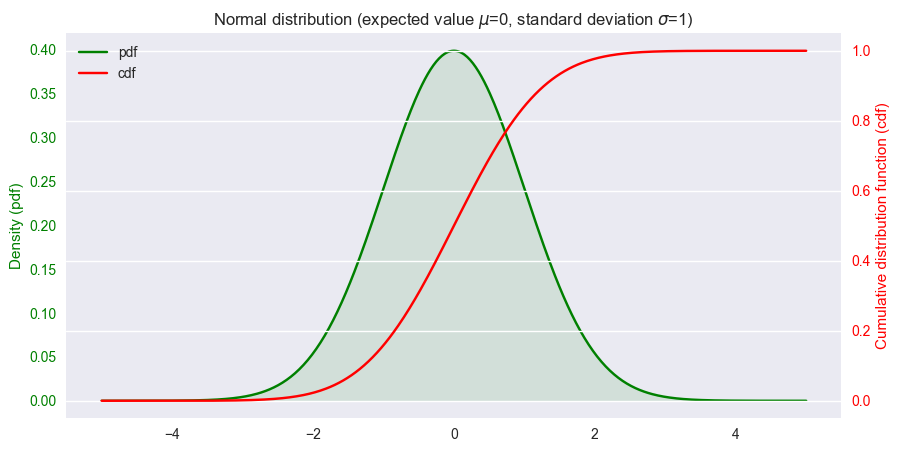

In [44]:
# Parameters for the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Parameters for scipy.stats.norm
loc = mu
scale = sigma

# Characteristics of the normal distribution
print("mean =", np.round(stats.norm.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.norm.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.norm.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.norm.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.norm.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.norm.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
mean = np.round(mu, 3)
variance = np.round(sigma**2, 3)
std = np.round(sigma, 3)
print("mean =", mean)
print("variance =", variance)
print("standard deviation =", std)

# Plots of pdf and cdf
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 500)
pdf = stats.norm.pdf(x, loc=loc, scale=scale)
cdf = stats.norm.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Normal distribution (expected value $\\mu$={mu}, standard deviation $\\sigma$={sigma})", x, pdf, cdf)

### Pareto distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Pareto&xm=1&alpha=5)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto)
* [Wikipedia](https://en.wikipedia.org/wiki/Pareto_distribution)

mean = 1.25
variance = 0.104
standard deviation = 0.323
skewness = 4.648
kurtosis = 70.8
entropy = -0.409
mean = 1.25
variance = 0.104
standard deviation = 0.323


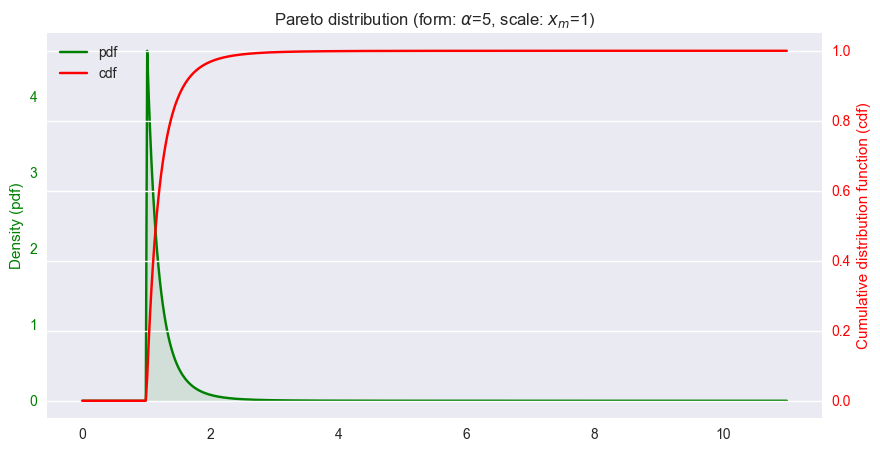

In [45]:
# Parameters for the Pareto distribution
alpha = 5  # form parameter
xm = 1  # scale parameter

# Parameters for scipy.stats.pareto
b = alpha
scale = xm

# Characteristics of the Pareto distribution
print("mean =", np.round(stats.pareto.mean(b, scale=scale), 3) if alpha > 1 else "undefined")
print("variance =", np.round(stats.pareto.var(b, scale=scale), 3) if alpha > 2 else "undefined")
print("standard deviation =", np.round(stats.pareto.std(b, scale=scale), 3) if alpha > 2 else "undefined")
print("skewness =", np.round(stats.pareto.stats(b, scale=scale, moments='s'), 3) if alpha > 3 else "undefined")
print("kurtosis =", np.round(stats.pareto.stats(b, scale=scale, moments='k'), 3) if alpha > 4 else "undefined")
print("entropy =", np.round(stats.pareto.entropy(b, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(alpha * xm / (alpha - 1), 3) if alpha > 1 else "undefined")
print("variance =", np.round((xm**2 * alpha) / ((alpha - 1)**2 * (alpha - 2)), 3) if alpha > 2 else "undefined")
print("standard deviation =", np.round(sqrt((xm**2 * alpha) / ((alpha - 1)**2 * (alpha - 2))), 3) if alpha > 2 else "undefined")

# Plots of pdf and cdf
x = np.linspace(xm - 1, xm + 10, 500)
pdf = stats.pareto.pdf(x, b, scale=scale)
cdf = stats.pareto.cdf(x, b, scale=scale)
plot_continuous(f"Pareto distribution (form: $\\alpha$={alpha}, scale: $x_m$={xm})", x, pdf, cdf)

### Pert distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Pert&a=5&b=7&c=10)
* [Wikipedia](https://en.wikipedia.org/wiki/PERT_distribution)

Pert distribution is not implemented in SciPy.

### Power distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Power&a=5&b=10&c=2)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.powerlaw.html#scipy.stats.powerlaw)
* [Wikipedia](https://en.wikipedia.org/wiki/Pareto_distribution#Inverse-Pareto_Distribution_/_Power_Distribution)

mean = 8.333
variance = 1.389
standard deviation = 1.179
skewness = -0.566
kurtosis = -0.6
entropy = 1.416
mean = 8.333
variance = 1.389
standard deviation = 1.179


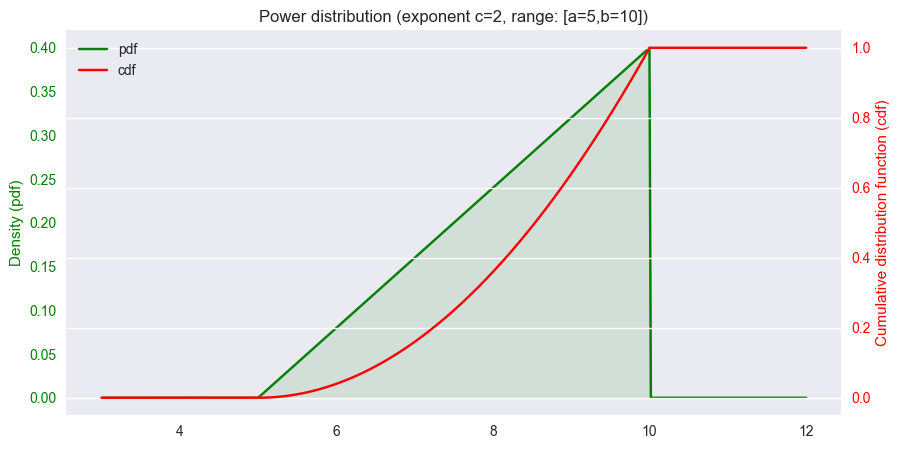

In [46]:
# Parameters for the power distribution
a = 5   # lower bound
b = 10  # upper bound
c = 2   # power exponent

# For scipy.stats.powerlaw, 'c' is the shape parameter (exponent), loc is the lower bound, scale is (b-a)
shape = c
loc = a
scale = b - a

# Characteristics of the power distribution
print("mean =", np.round(stats.powerlaw.mean(shape, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.powerlaw.var(shape, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.powerlaw.std(shape, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.powerlaw.stats(shape, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.powerlaw.stats(shape, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.powerlaw.entropy(shape, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
mean = np.round(a + (b - a) * shape / (shape + 1), 3)
variance = np.round((b - a)**2 * shape / ((shape + 2) * (shape + 1)**2), 3)
std = np.round(sqrt((b - a)**2 * shape / ((shape + 2) * (shape + 1)**2)), 3)
print("mean =", mean)
print("variance =", variance)
print("standard deviation =", std)

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.powerlaw.pdf(x, shape, loc=loc, scale=scale)
cdf = stats.powerlaw.cdf(x, shape, loc=loc, scale=scale)
plot_continuous(f"Power distribution (exponent c={c}, range: [a={a},b={b}])", x, pdf, cdf)

### Rayleigh distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Rayleigh&m=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html#scipy.stats.rayleigh)
* [Wikipedia](https://en.wikipedia.org/wiki/Rayleigh_distribution)

mean = 6.267
variance = 10.73
standard deviation = 3.276
skewness = 0.631
kurtosis = 0.245
entropy = 2.551
mean = 3
variance = 2.459
standard deviation = 1.568


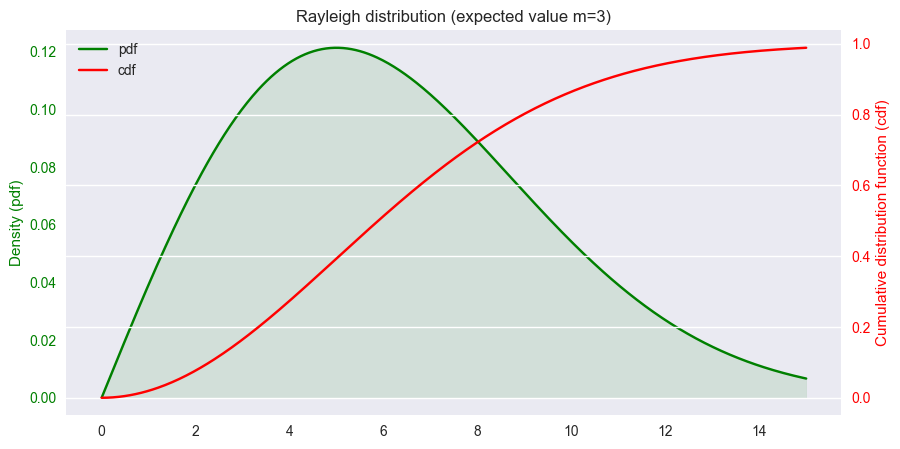

In [47]:
# Parameters for the Rayleigh distribution
m = 3  # Expected value

# Parameters for scipy.stats.rayleigh
sigma = m * sqrt(2 / pi)
scale = scale

# Characteristics of the Rayleigh distribution
print("mean =", np.round(stats.rayleigh.mean(scale=scale), 3))
print("variance =", np.round(stats.rayleigh.var(scale=scale), 3))
print("standard deviation =", np.round(stats.rayleigh.std(scale=scale), 3))
print("skewness =", np.round(stats.rayleigh.stats(scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.rayleigh.stats(scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.rayleigh.entropy(scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(m, 3))
print("variance =", np.round((4 - pi) / 2 * sigma**2, 3))
print("standard deviation =", np.round(sqrt((4 - pi) / 2) * sigma, 3))

# Plots of pdf and cdf
x = np.linspace(0, 5 * m, 500)
pdf = stats.rayleigh.pdf(x, scale=scale)
cdf = stats.rayleigh.cdf(x, scale=scale)
plot_continuous(f"Rayleigh distribution (expected value m={m})", x, pdf, cdf)

### Reciprocal distribution (log-uniform distribution)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Reciprocal&a=2&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loguniform.html#scipy.stats.loguniform)
* [Wikipedia](https://en.wikipedia.org/wiki/Reciprocal_distribution)

mean = 4.971
variance = 5.116
standard deviation = 2.262
skewness = 0.548
kurtosis = -0.87
entropy = 1.974
mean = 4.971
variance = 5.116
standard deviation = 2.262


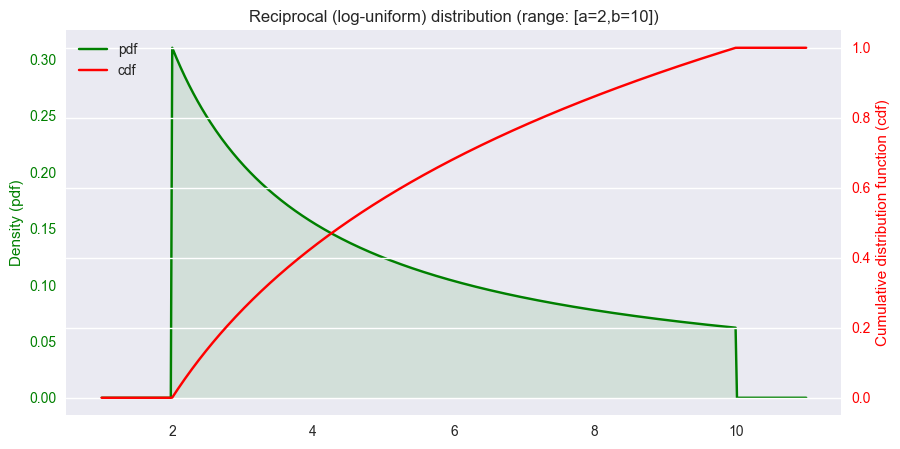

In [48]:
# Parameters for the reciprocal distribution
a = 2  # lower bound
b = 10  # upper bound

# Parameters for scipy.stats.loguniform (reciprocal)
loc = a
scale = b

# Characteristics of the reciprocal distribution
print("mean =", np.round(stats.loguniform.mean(a, b), 3))
print("variance =", np.round(stats.loguniform.var(a, b), 3))
print("standard deviation =", np.round(stats.loguniform.std(a, b), 3))
print("skewness =", np.round(stats.loguniform.stats(a, b, moments='s'), 3))
print("kurtosis =", np.round(stats.loguniform.stats(a, b, moments='k'), 3))
print("entropy =", np.round(stats.loguniform.entropy(a, b), 3))

# Direct calculation of mean, variance, and standard deviation
mean = np.round((b - a) / log(b / a), 3)
variance = np.round((b**2 - a**2) / (2 * log(b / a)) - ((b - a) / log(b / a))**2, 3)
std = np.round(sqrt(variance), 3)
print("mean =", mean)
print("variance =", variance)
print("standard deviation =", std)

# Plots of pdf and cdf
x = np.linspace(a - 1, b + 1, 500)
pdf = stats.loguniform.pdf(x, a, b)
cdf = stats.loguniform.cdf(x, a, b)
plot_continuous(f"Reciprocal (log-uniform) distribution (range: [a={a},b={b}])", x, pdf, cdf)

### Right sawtooth distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=SawtoothRight&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang)
* [Wikipedia](https://en.wikipedia.org/wiki/Triangular_distribution)

mean = 8.333
variance = 1.389
standard deviation = 1.179
skewness = -0.566
kurtosis = -0.6
entropy = 1.416
mean = 5.333
variance = 3.389
standard deviation = 1.841


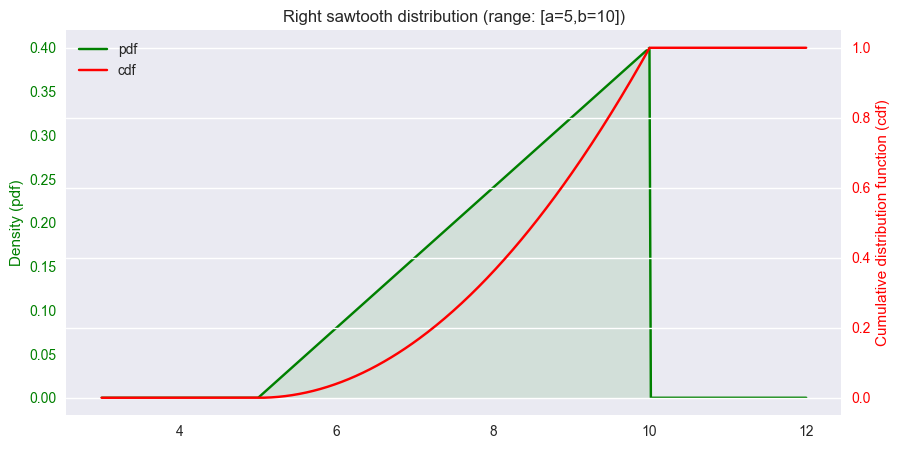

In [49]:
# Parameters for the right sawtooth distribution
a = 5   # lower bound
b = 10  # upper bound

# For scipy.stats.triang, b is the mode location, interval is [a, b]
c = 1
loc = a
scale = b - a

# Characteristics of the right sawtooth distribution
print("mean =", np.round(stats.triang.mean(c, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.triang.var(c, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.triang.std(c, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.triang.stats(c, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.triang.stats(c, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.triang.entropy(c, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((a + b + c) / 3, 3))
print("variance =", np.round((a**2 + b**2 + c**2 - a * b - a * c - b * c) / 18, 3))
print("standard deviation =", np.round(sqrt((a**2 + b**2 + c**2 - a * b - a * c - b * c) / 18), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.triang.pdf(x, c, loc=loc, scale=scale)
cdf = stats.triang.cdf(x, c, loc=loc, scale=scale)
plot_continuous(f"Right sawtooth distribution (range: [a={a},b={b}])", x, pdf, cdf)

### Sine distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Sine&a=5&b=10)
* No Wikipedia page

The sine distribution is not implemented in SciPy.

### Student's t distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=StudentT&nu=5&mu=0)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)
* [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)

mean = 2.0
variance = 1.667
standard deviation = 1.291
skewness = 0.0
kurtosis = 6.0
entropy = 1.628
mean = 2
variance = 1.667
standard deviation = 1.291


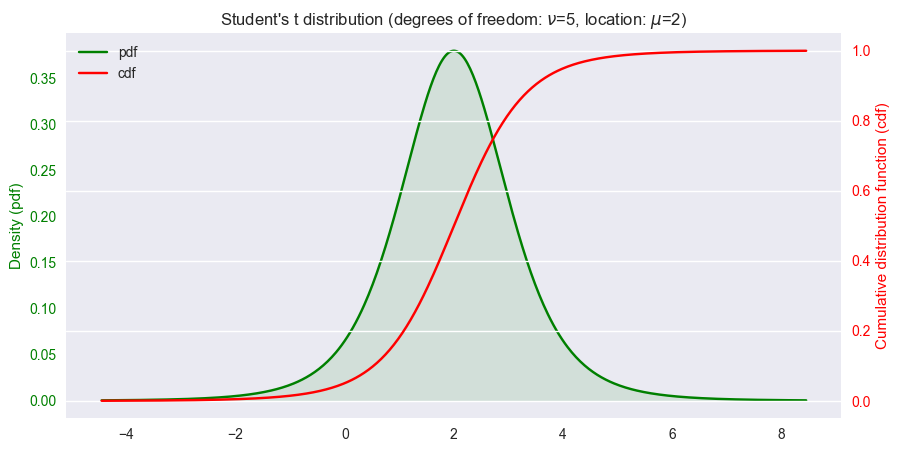

In [50]:
# Parameters for the Student's t distribution
nu = 5  # degrees of freedom
mu = 2  # location parameter

# Parameters for scipy.stats.t
df = nu
loc = mu

# Characteristics of the Student's t distribution
print("mean =", np.round(stats.t.mean(df, loc=loc), 3) if df > 1 else "undefined")
print("variance =", np.round(stats.t.var(df, loc=loc), 3) if df > 2 else "undefined")
print("standard deviation =", np.round(stats.t.std(df, loc=loc), 3) if df > 2 else "undefined")
print("skewness =", np.round(stats.t.stats(df, loc=loc, moments='s'), 3) if df > 3 else "undefined")
print("kurtosis =", np.round(stats.t.stats(df, loc=loc, moments='k'), 3) if df > 4 else "undefined")
print("entropy =", np.round(stats.t.entropy(df, loc=loc), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(mu, 3) if nu > 1 else "undefined")
print("variance =", np.round(nu / (nu - 2), 3) if nu > 2 else "undefined")
print("standard deviation =", np.round(sqrt(nu / (nu - 2)), 3) if nu > 2 else "undefined")

# Plots of pdf and cdf
x = np.linspace(mu - 5 * sqrt(nu / (nu - 2)), mu + 5 * sqrt(nu / (nu - 2)), 500)
pdf = stats.t.pdf(x, df, loc=loc)
cdf = stats.t.cdf(x, df, loc=loc)
plot_continuous(f"Student's t distribution (degrees of freedom: $\\nu$={nu}, location: $\\mu$={mu})", x, pdf, cdf)

### Trapezoid distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Trapezoid&a=3&b=5&c=10&d=14)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.trapezoid.html#scipy.stats.trapezoid)
* [Wikipedia](https://en.wikipedia.org/wiki/Trapezoidal_distribution)

mean = 8.063
variance = 6.163
standard deviation = 2.482
skewness = 0.127
kurtosis = -0.922
entropy = 2.267
mean = 8.0
variance = 6.917
standard deviation = 2.63


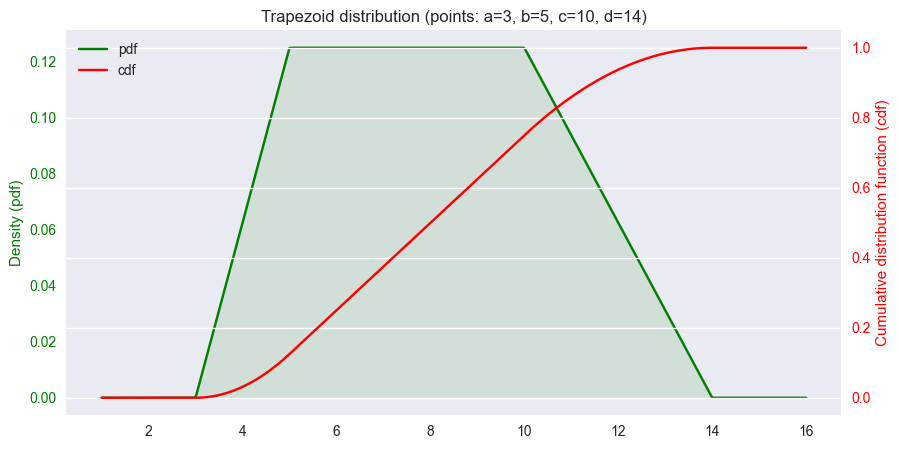

In [51]:
# Parameters for the trapezoid distribution
a = 3   # lower bound
b = 5   # left top
c = 10  # right top
d = 14  # upper bound

# For scipy.stats.trapezoid, c and d are shape parameters: c = (b-a)/(d-a), d = (c-a)/(d-a)
c_shape = (b - a) / (d - a)
d_shape = (c - a) / (d - a)
loc = a
scale = d - a

# Characteristics of the trapezoid distribution
print("mean =", np.round(stats.trapezoid.mean(c_shape, d_shape, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.trapezoid.var(c_shape, d_shape, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.trapezoid.std(c_shape, d_shape, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.trapezoid.stats(c_shape, d_shape, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.trapezoid.stats(c_shape, d_shape, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.trapezoid.entropy(c_shape, d_shape, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
# For a trapezoid distribution, the mean and variance can be calculated as follows:
# mean = (a + b + c + d) / 4
# variance = ((d - a)**2 + (c - b)**2 + (d - c)**2 + (b - a)**2) / 24
mean = np.round((a + b + c + d) / 4, 3)
variance = np.round(((d - a)**2 + (c - b)**2 + (d - c)**2 + (b - a)**2) / 24, 3)
std = np.round(sqrt(variance), 3)
print("mean =", mean)
print("variance =", variance)
print("standard deviation =", std)

# Plots of pdf and cdf
x = np.linspace(a - 2, d + 2, 500)
pdf = stats.trapezoid.pdf(x, c_shape, d_shape, loc=loc, scale=scale)
cdf = stats.trapezoid.cdf(x, c_shape, d_shape, loc=loc, scale=scale)
plot_continuous(f"Trapezoid distribution (points: a={a}, b={b}, c={c}, d={d})", x, pdf, cdf)

### Triangular distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Triangular&a=5&c=7&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang)
* [Wikipedia](https://en.wikipedia.org/wiki/Triangular_distribution)

mean = 7.333
variance = 1.056
standard deviation = 1.027
skewness = 0.191
kurtosis = -0.6
entropy = 1.416
mean = 7.333
variance = 1.056
standard deviation = 1.027


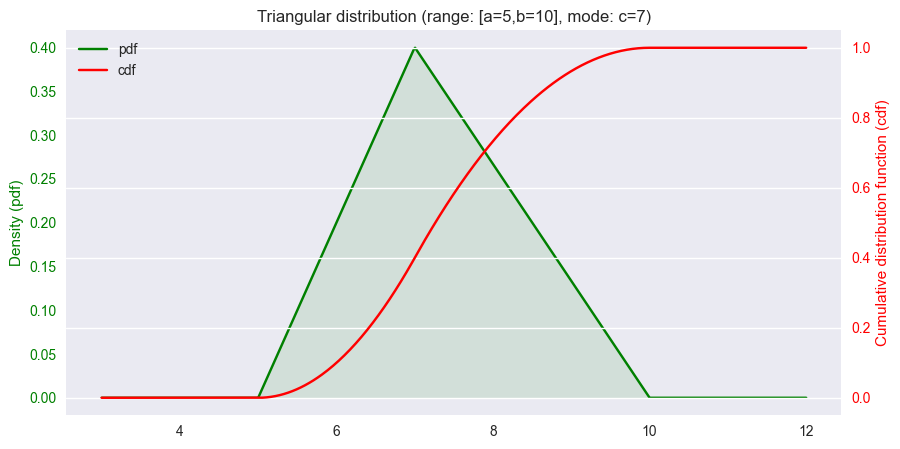

In [52]:
# Parameters for the triangular distribution
a = 5   # lower bound
c = 7   # mode
b = 10  # upper bound

# For scipy.stats.triang, c is the mode location as a fraction of the interval [a, b]
c_param = (c - a) / (b - a)
loc = a
scale = b - a

# Characteristics of the triangular distribution
print("mean =", np.round(stats.triang.mean(c_param, loc=loc, scale=scale), 3))
print("variance =", np.round(stats.triang.var(c_param, loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.triang.std(c_param, loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.triang.stats(c_param, loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.triang.stats(c_param, loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.triang.entropy(c_param, loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((a + b + c) / 3, 3))
print("variance =", np.round((a**2 + b**2 + c**2 - a * b - a * c - b * c) / 18, 3))
print("standard deviation =", np.round(sqrt((a**2 + b**2 + c**2 - a * b - a * c - b * c) / 18), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.triang.pdf(x, c_param, loc=loc, scale=scale)
cdf = stats.triang.cdf(x, c_param, loc=loc, scale=scale)
plot_continuous(f"Triangular distribution (range: [a={a},b={b}], mode: c={c})", x, pdf, cdf)

### U-quadratic distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=UQuadratic&a=2&b=10)
* [Wikipedia](https://en.wikipedia.org/wiki/U-quadratic_distribution)

The U-quadratic distribution is not implemented in SciPy.

### Uniform distribution (continuous)

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Uniform&a=5&b=10)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform)
* [Wikipedia](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

mean = 7.5
variance = 2.083
standard deviation = 1.443
skewness = 0.0
kurtosis = -1.2
entropy = 1.609
mean = 7.5
variance = 2.083
standard deviation = 1.443


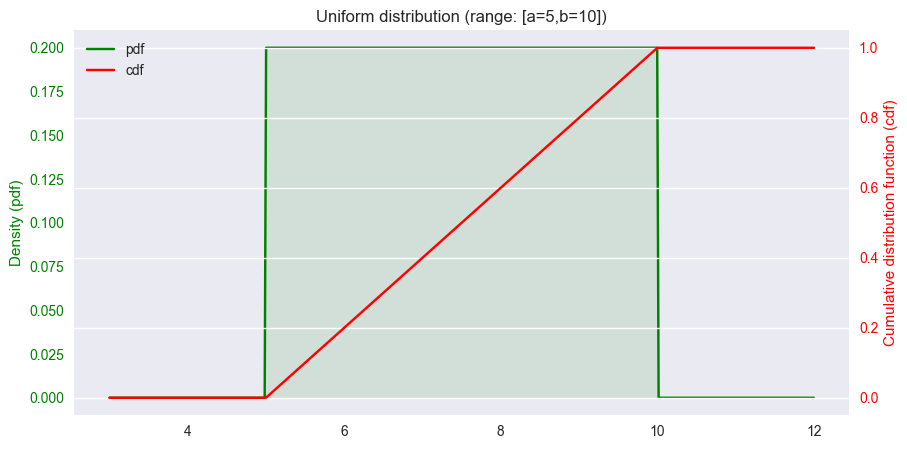

In [53]:
# Parameters for the continuous uniform distribution
a = 5   # lower bound
b = 10  # upper bound

# For scipy.stats.uniform, loc is the lower bound, scale is (b-a)
loc = a
scale = b - a

# Characteristics of the uniform distribution
print("mean =", np.round(stats.uniform.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.uniform.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.uniform.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.uniform.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.uniform.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.uniform.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round((a + b) / 2, 3))
print("variance =", np.round(((b - a) ** 2) / 12, 3))
print("standard deviation =", np.round((b - a) / sqrt(12), 3))

# Plots of pdf and cdf
x = np.linspace(a - 2, b + 2, 500)
pdf = stats.uniform.pdf(x, loc=loc, scale=scale)
cdf = stats.uniform.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Uniform distribution (range: [a={a},b={b}])", x, pdf, cdf)

### Weibull distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=Weibull&beta=2&lambda=0.2)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html#scipy.stats.weibull_min)
* [Wikipedia](https://en.wikipedia.org/wiki/Weibull_distribution)

mean = 4.431
variance = 5.365
standard deviation = 2.316
skewness = 0.631
kurtosis = 0.245
entropy = 2.205
mean = 4.431
variance = 5.365
standard deviation = 2.316


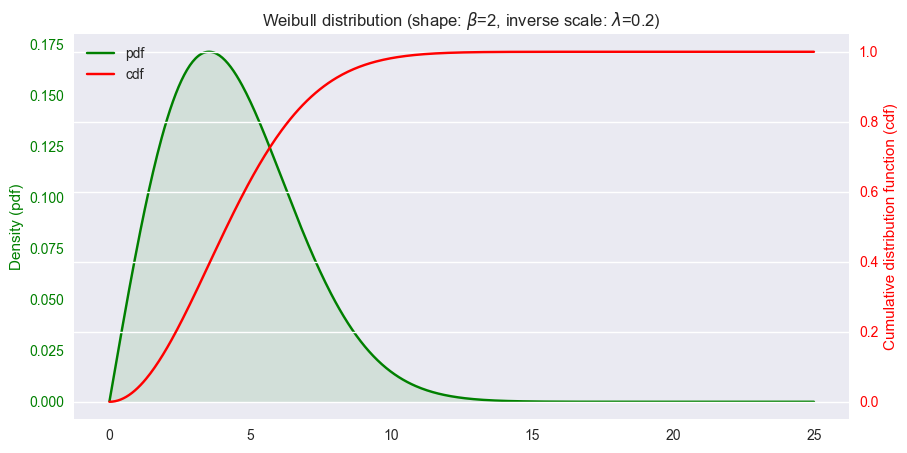

In [54]:
# Parameters for the Weibull distribution
beta = 2      # shape parameter
lmbda = 0.2   # inverse scale parameter

# For scipy.stats.weibull_min, c is the shape parameter, scale is 1/lambda
c = beta
scale = 1 / lmbda

# Characteristics of the Weibull distribution
print("mean =", np.round(stats.weibull_min.mean(c, scale=scale), 3))
print("variance =", np.round(stats.weibull_min.var(c, scale=scale), 3))
print("standard deviation =", np.round(stats.weibull_min.std(c, scale=scale), 3))
print("skewness =", np.round(stats.weibull_min.stats(c, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.weibull_min.stats(c, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.weibull_min.entropy(c, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
mean = np.round(sp_gamma(1 + 1 / beta) / lmbda, 3)
variance = np.round((sp_gamma(1 + 2 / beta) - (sp_gamma(1 + 1 / beta))**2) / lmbda**2, 3)
std = np.round(sqrt(variance), 3)
print("mean =", mean)
print("variance =", variance)
print("standard deviation =", std)

# Plots of pdf and cdf
x = np.linspace(0, scale * 5, 500)
pdf = stats.weibull_min.pdf(x, c, scale=scale)
cdf = stats.weibull_min.cdf(x, c, scale=scale)
plot_continuous(f"Weibull distribution (shape: $\\beta$={beta}, inverse scale: $\\lambda$={lmbda})", x, pdf, cdf)

### Wigner half-circle distribution

* [Distributions Webapp](https://a-herzog.github.io/Distributions/?distribution=WignerSemicircle&m=0&R=3)
* [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.semicircular.html#scipy.stats.semicircular)
* [Wikipedia](https://en.wikipedia.org/wiki/Wigner_semicircle_distribution)

mean = 0.0
variance = 2.25
standard deviation = 1.5
skewness = 0.0
kurtosis = -1.0
entropy = 1.743
mean = 0
variance = 2.25
standard deviation = 1.5


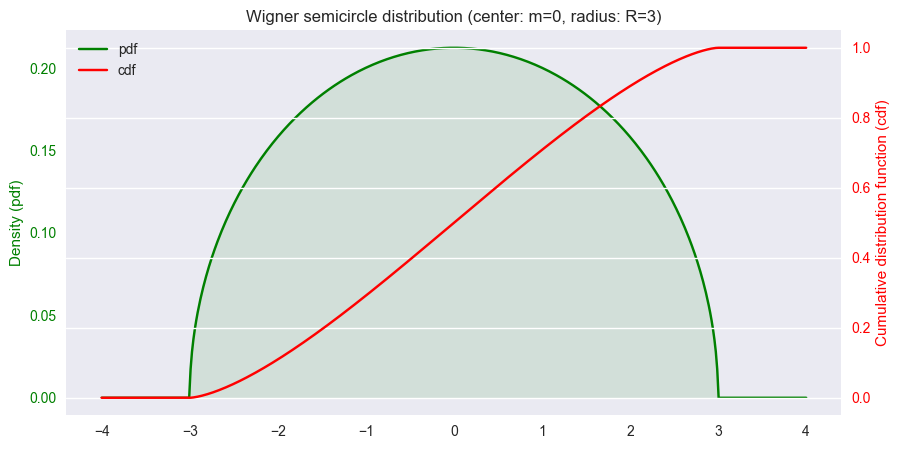

In [55]:
# Parameters for the Wigner semicircle distribution
m = 0  # mean (center)
R = 3  # radius

# For scipy.stats.semicircular, loc is the center, scale is the radius
loc = m
scale = R

# Characteristics of the Wigner semicircle distribution
print("mean =", np.round(stats.semicircular.mean(loc=loc, scale=scale), 3))
print("variance =", np.round(stats.semicircular.var(loc=loc, scale=scale), 3))
print("standard deviation =", np.round(stats.semicircular.std(loc=loc, scale=scale), 3))
print("skewness =", np.round(stats.semicircular.stats(loc=loc, scale=scale, moments='s'), 3))
print("kurtosis =", np.round(stats.semicircular.stats(loc=loc, scale=scale, moments='k'), 3))
print("entropy =", np.round(stats.semicircular.entropy(loc=loc, scale=scale), 3))

# Direct calculation of mean, variance, and standard deviation
print("mean =", np.round(m, 3))
print("variance =", np.round(R**2 / 4, 3))
print("standard deviation =", np.round(R / 2, 3))

# Plots of pdf and cdf
x = np.linspace(m - R - 1, m + R + 1, 500)
pdf = stats.semicircular.pdf(x, loc=loc, scale=scale)
cdf = stats.semicircular.cdf(x, loc=loc, scale=scale)
plot_continuous(f"Wigner semicircle distribution (center: m={m}, radius: R={R})", x, pdf, cdf)